# <center> Hotel Cancellation Prediction </center>

In [10]:
# Import Essentials Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import graphviz 
import plotly.express as px
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, BatchNormalization, LSTM, Conv1D, Embedding, GRU, GlobalAveragePooling1D, MaxPooling1D, Dropout
from tensorflow.keras.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree
from sklearn.tree import export_graphviz
warnings.filterwarnings('ignore')
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.callbacks import ModelCheckpoint

# Abstract

This report aims to explore the hotel industry in developing effective pricing strategies by predicting hotel booking cancellations. The data used for analysis was obtained from the Kaggle (Mostipak, 2020). It employed a comprehensive approach, utilising thirteen distinct machine learning and deep learning models to predict hotel booking cancellations as a classification problem.

Through our analysis, we observed that most of our models achieved an accuracy rate exceeding 80%. The Random Forest Classifier model exhibited the highest accuracy rate of 87.63% on this dataset. However, it is crucial to acknowledge that each model applied distinct methodologies in processing the dataset, potentially influencing the outcomes in terms of the accuracy rate.

By leveraging these predictive models, hotel operators can anticipate booking demand more accurately, optimising pricing decisions and enhancing revenue management.


# Background

Cancellation management is a critical aspect of revenue management in the hotel industry, particularly in the current landscape marked by economic uncertainty, inflation, and intense competition (PwC, 2022). Cancellations not only result in lost revenue but also disrupt operational efficiency, making it challenging for hotels to manage room inventory and optimise pricing. Therefore, understanding the factors contributing to cancellations and developing effective strategies to manage them is paramount for optimising revenue and ensuring sustainable success (Chen et al., 2023).

This project aims to delve into the issue of cancellations in the hotel industry. We will investigate the predictive power of various features such as lead time, the country of origin of the guest, and the Average Daily Rate (ADR) in forecasting cancellations. The ultimate goal is to develop a robust predictive model that can help hotels mitigate the impact of cancellations on their operations and revenue, thereby contributing to their resilience and success in a challenging market environment.


# Data Import

In [11]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [13]:
# checking for null values 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

### 1. Handling missing data
Null values were identified in "company," "agent," and "country" variables, constituting 94%, 14%, and 0.4% respectively. Furthermore, only 4 rows in the "children" variable are null. We filled numeric null values with 0 and converted "country" null values to "Unknown". The "company" and "agent" variables were excluded due to their high null percentage.


In [14]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without one.
# company: If none given, it was most likely private.
# rest schould be self-explanatory.
null_replace = {"children": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df_clean = df.fillna(null_replace)

In [15]:
# checking for null values after replace missing value
null_df_clean = pd.DataFrame({'Null Values' : df_clean.isna().sum(), 'Percentage Null Values' : (df_clean.isna().sum()) / (df_clean.shape[0]) * (100)})
null_df_clean

Null Values  Percentage Null Values
hotel                                     0                     0.0
is_canceled                               0                     0.0
lead_time                                 0                     0.0
arrival_date_year                         0                     0.0
arrival_date_month                        0                     0.0
arrival_date_week_number                  0                     0.0
arrival_date_day_of_month                 0                     0.0
stays_in_weekend_nights                   0                     0.0
stays_in_week_nights                      0                     0.0
adults                                    0                     0.0
children                                  0                     0.0
babies                                    0                     0.0
meal                                      0                     0.0
country                                   0                     0.0
market_segment                            0                     0.0
distribution_channel                      0                     0.0
is_repeated_guest                         0                     0.0
previous_cancellations                    0                     0.0
previous_bookings_not_canceled            0                     0.0
reserved_room_type                        0                     0.0
assigned_room_type                        0                     0.0
booking_changes                           0                     0.0
deposit_type                              0                     0.0
agent                                     0                     0.0
company                                   0                     0.0
days_in_waiting_list                      0                     0.0
customer_type                             0                     0.0
adr                                       0                     0.0
required_car_parking_spaces               0                     0.0
total_of_special_requests                 0                     0.0
reservation_status                        0                     0.0
reservation_status_date                   0                     0.0

### 2. Correct grouping data
The "Meal" variable corresponds to standard hospitality meal packages, where "Undefined" is equivalent to "SC" (self-catering). Hence, we corrected inconsistencies in the "Meal" variable, replacing "Undefined" with "SC" (self-catering).

In [16]:
# "meal" contains values "Undefined", which is equal to SC.
df_clean["meal"].replace("Undefined", "SC", inplace=True)

### 3. Handling unusual data
Instances where bookings had zero guests were replaced with the median value in the "adults" feature.


In [17]:
#Filling 0 adults with median
median_adults = df_clean.loc[df_clean['adults']!=0, 'adults'].median()
print(median_adults)

2.0


In [18]:
df_clean.loc[df_clean['adults']==0, 'adults'] = median_adults

### 4. Checking duplicate data
Duplicates were checked, but without unique identifiers, no concrete duplicates were established due to the possibility of real-world scenarios resulting in identical data points.


In [19]:
# df_clean.duplicated().sum()

In [20]:
df_clean.shape

(119390, 32)

In [21]:
df_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    0.0     0.0                    0     Transient   0.0   
1    0.0     0.0                    0     Transient   0.0   
2    0.0     0.0                    0     Transient  75.0   
3  304.0     0.0                    0     Transient  75.0   
4  240.0     0.0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# Exploratory Data Analysis

In [22]:
df_clean.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.863154   
std                   0.998613              1.908286       0.569152   
min                   0.000000              0.000000       1.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent        company  days_in_waiting_list  \
count    119390.000000  119390.000000  119390.000000         119390.000000   
mean          0.221124      74.828319      10.775157              2.321149   
std           0.652306     107.141953      53.943884             17.594721   
min           0.000000       0.000000       0.000000              0.000000   
25%           0.000000       7.000000       0.000000              0.000000   
50%           0.000000       9.000000       0.000000              0.000000   
75%           0.000000     152.000000       0.000000              0.000000   
max          21.000000     535.000000     543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
5

### The graph below displays a majority of variables, including lead time and adr, showing a left-skewed distribution.

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


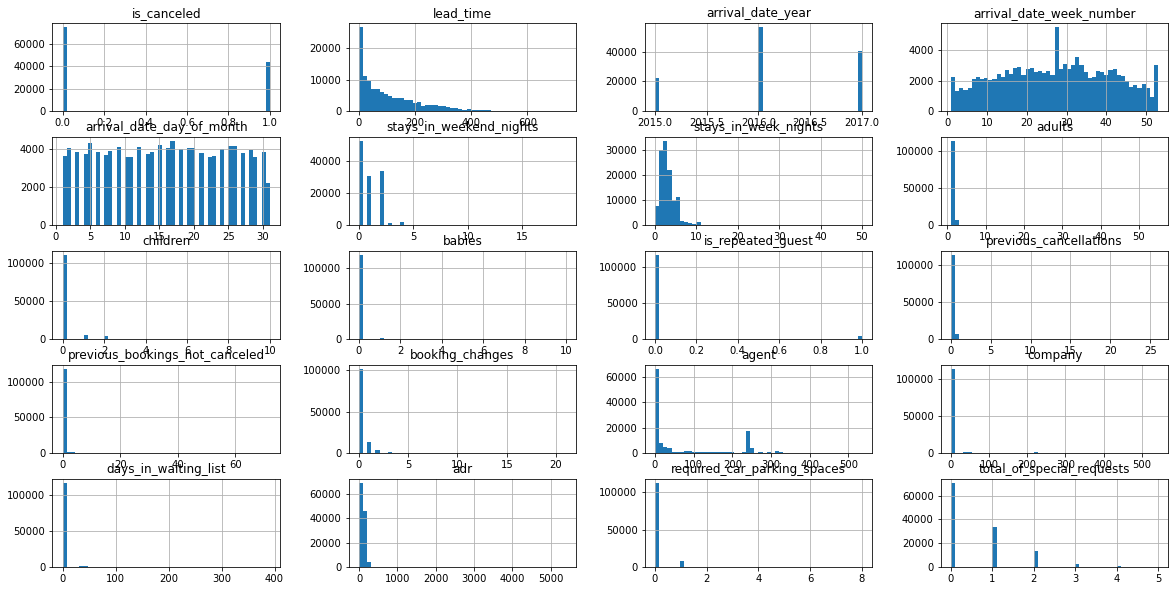

In [23]:
# visually inspect the data
df_clean.hist(bins=50, figsize=(20,10))

In [24]:
df_clean.head().T

0             1             2  \
hotel                           Resort Hotel  Resort Hotel  Resort Hotel   
is_canceled                                0             0             0   
lead_time                                342           737             7   
arrival_date_year                       2015          2015          2015   
arrival_date_month                      July          July          July   
arrival_date_week_number                  27            27            27   
arrival_date_day_of_month                  1             1             1   
stays_in_weekend_nights                    0             0             0   
stays_in_week_nights                       0             0             1   
adults                                     2             2             1   
children                                 0.0           0.0           0.0   
babies                                     0             0             0   
meal                                      BB            BB            BB   
country                                  PRT           PRT           GBR   
market_segment                        Direct        Direct        Direct   
distribution_channel                  Direct        Direct        Direct   
is_repeated_guest                          0             0             0   
previous_cancellations                     0             0             0   
previous_bookings_not_canceled             0             0             0   
reserved_room_type                         C             C             A   
assigned_room_type                         C             C             C   
booking_changes                            3             4             0   
deposit_type                      No Deposit    No Deposit    No Deposit   
agent                                    0.0           0.0           0.0   
company                                  0.0           0.0           0.0   
days_in_waiting_list                       0             0             0   
customer_type                      Transient     Transient     Transient   
adr                                      0.0           0.0          75.0   
required_car_parking_spaces                0             0             0   
total_of_special_requests                  0             0             0   
reservation_status                 Check-Out     Check-Out     Check-Out   
reservation_status_date           2015-07-01    2015-07-01    2015-07-02   

                                           3             4  
hotel                           Resort Hotel  Resort Hotel  
is_canceled                                0             0  
lead_time                                 13            14  
arrival_date_year                       2015          2015  
arrival_date_month                      July          July  
arrival_date_week_number                  27            27  
arrival_date_day_of_month                  1             1  
stays_in_weekend_nights                    0             0  
stays_in_week_nights                       1             2  
adults                                     1             2  
children                                 0.0           0.0  
babies                                     0             0  
meal                                      BB            BB  
country                                  GBR           GBR  
market_segment                     Corporate     Online TA  
distribution_channel               Corporate         TA/TO  
is_repeated_guest                          0             0  
previous_cancellations                     0             0  
previous_bookings_not_canceled             0             0  
reserved_room_type                         A             A  
assigned_room_type                         A             A  
booking_changes                            0             0  
deposit_type                      No Deposit    No Deposit  
agent                                  304.0         240.0  
company  

### The heatmap matrix below highlights strong correlations among variables. Notably, lead_time, previous_cancellation, total_of_special_requests, and required_car_parking_spaces strongly correlate with cancellations, guiding our subsequent data selection.


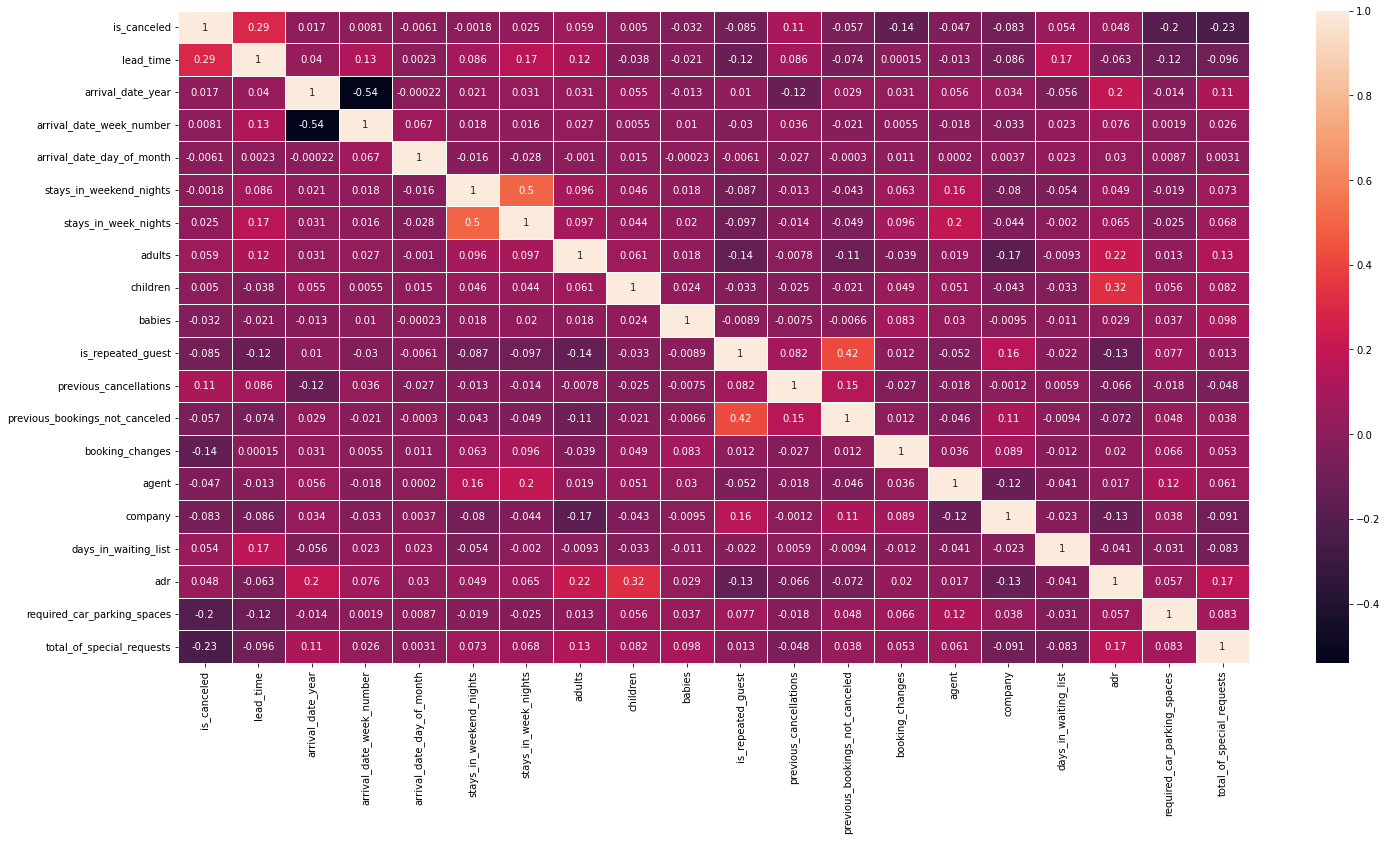

In [25]:
#correlation
plt.figure(figsize = (24, 12))

corr = df_clean.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [26]:
correlation = df_clean.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.058628
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [27]:
# No of unique variables for each columns
dict_={}
for feature in df_clean.columns:
    dict_[feature]=df_clean[feature].value_counts().shape[0]
pd.DataFrame(dict_,index=['unique_counts']).transpose()

unique_counts
hotel                                       2
is_canceled                                 2
lead_time                                 479
arrival_date_year                           3
arrival_date_month                         12
arrival_date_week_number                   53
arrival_date_day_of_month                  31
stays_in_weekend_nights                    17
stays_in_week_nights                       35
adults                                     13
children                                    5
babies                                      5
meal                                        4
country                                   178
market_segment                              8
distribution_channel                        5
is_repeated_guest                           2
previous_cancellations                     15
previous_bookings_not_canceled             73
reserved_room_type                         10
assigned_room_type                         12
booking_changes                            21
deposit_type                                3
agent                                     334
company                                   353
days_in_waiting_list                      128
customer_type                               4
adr                                      8879
required_car_parking_spaces                 5
total_of_special_requests                   6
reservation_status                          3
reservation_status_date                   926

### For the below bar graph
### Do the two hotels have different guests cancellation propensities?
The bar chart on the top left indicates higher cancellation rates at the City Hotel compared to the the Resort Hotel, highlighting distinct cancellation patterns across each hotel.

<br>

### Does the cancellation rate differ across different months?
(Top right graph)The proportion of booking cancellations are relatively stable throughout the month.

<br>

### Do cancellation propensities vary across different distribution channels?
(Bottom left graph)Bookings via TA/TO channels exhibit a higher cancellation rate compared to other distribution methods.

<br>

### Do cancellation propensities vary across different market segment?
(Bottom right)Customer cancellation behaviour varies by market segment. Notably, the Online TA, Offline TA/TO, and Groups segments show higher cancellation rates, while other segments demonstrate fewer cancellations.

<AxesSubplot:xlabel='market_segment', ylabel='count'>

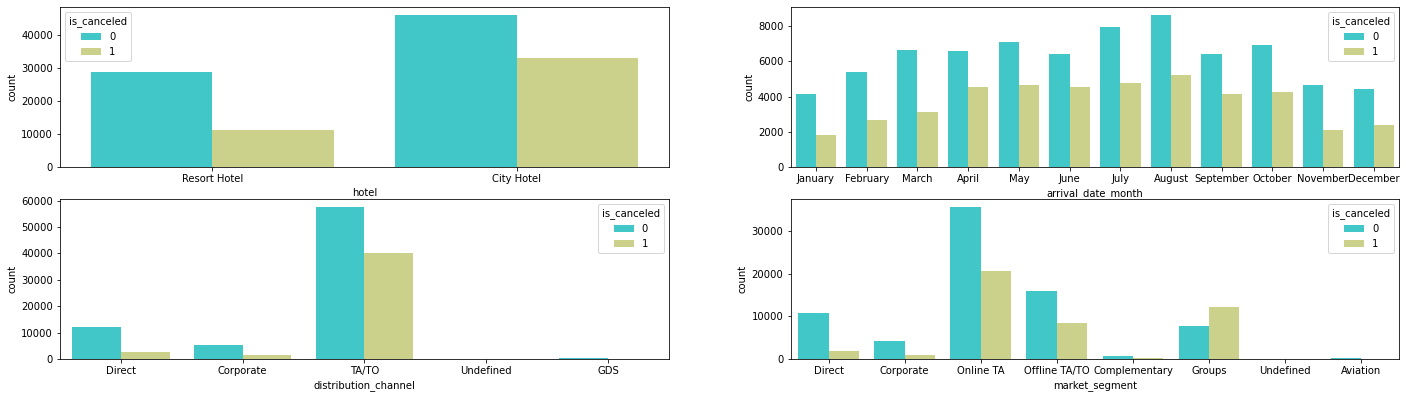

In [28]:
fig=plt.figure(figsize=(24,10))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='hotel',data=df_clean,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='arrival_date_month',data=df_clean,ax=ax[1],hue='is_canceled',palette='rainbow',order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.countplot(x='distribution_channel',data=df_clean,ax=ax[2],hue='is_canceled',palette='rainbow') 
sns.countplot(x='market_segment',data=df_clean,ax=ax[3],hue='is_canceled',palette='rainbow')

### For the below bar graph

### Do cancellation propensities vary across different meal type?
(Top left) Most customers opt for the Bed & Breakfast (BB) meal option, with cancellation rates not significantly differing across various meal types.

<br>


### Do cancellation propensities vary across different room type?
(Top right) Most customers prefer Room Type A, with no significant difference in cancellation rates across various room types.

<br>

### Do repeated and new customers have different cancellation propensities?
(Bottom left) Most guests are new customers, however, it obviously shows that repeated guests rarely cancelled the booking compared to new customers.

<br>

### Do cancellation propensities vary across different customer type?
(Bottom right) The majority of customers are Transient types. There is no significant different proportion of cancellation booking among different customer_type. 

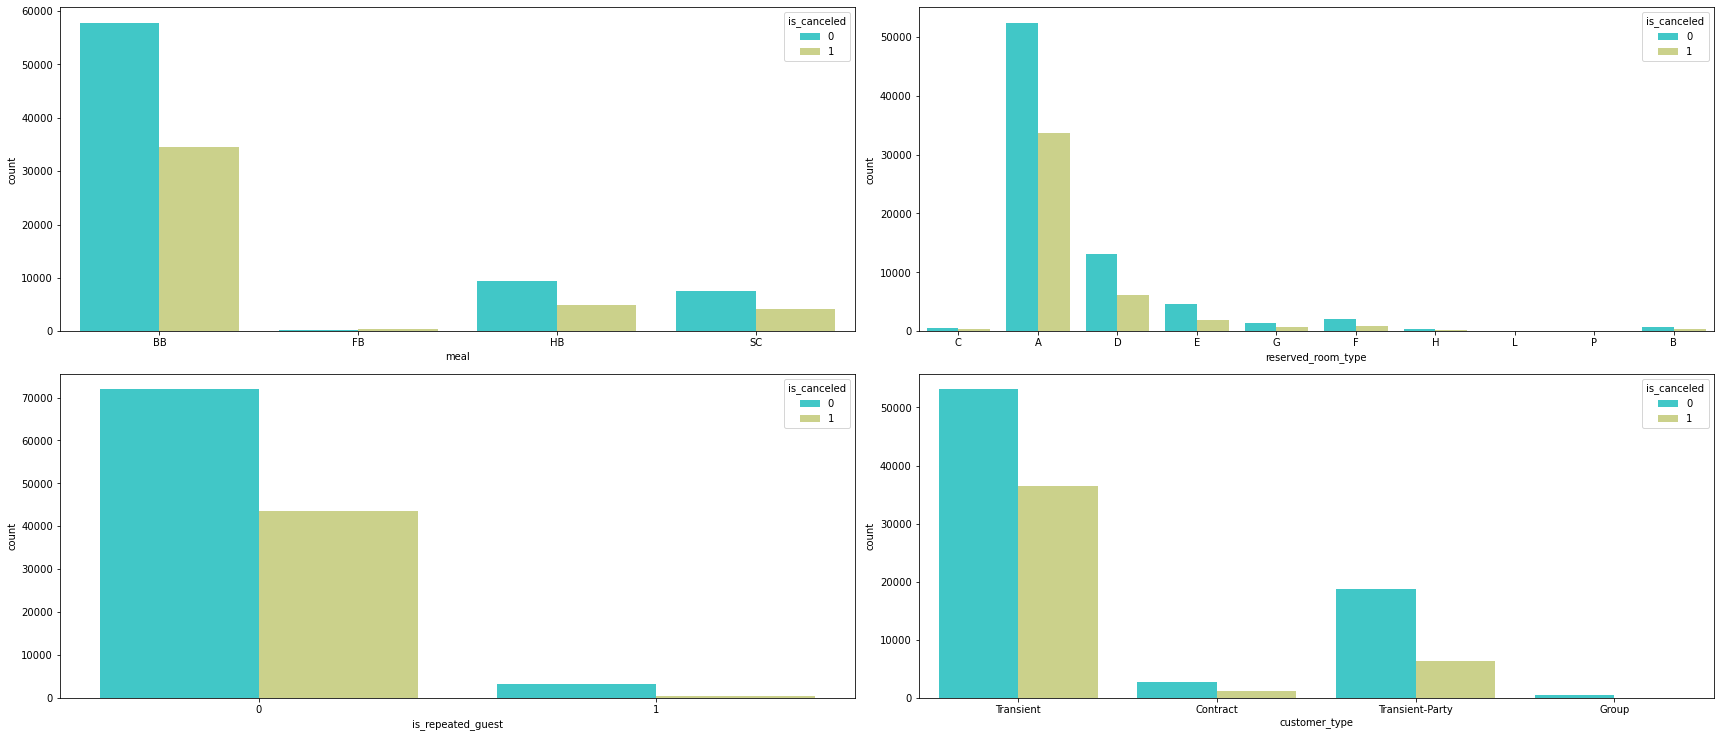

In [29]:
fig=plt.figure(figsize=(24,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='meal',data=df_clean,ax=ax[0],hue='is_canceled',palette='rainbow') #BB:Bed&Breakfast, HB: Half Board(Breakfast and Dinner normally), FB: Full Board(Breakfast, Lunch and Dinner), SC = self-catering
sns.countplot(x='reserved_room_type',data=df_clean,ax=ax[1],hue='is_canceled',palette='rainbow')
sns.countplot(x='is_repeated_guest',data=df_clean,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='customer_type',data=df_clean,ax=ax[3],hue='is_canceled',palette='rainbow')
plt.tight_layout()

### For the below graph

### Does the type of deposit influence cancellation behavior?
(Top left) Although most guests chose the 'No Deposit' option, a significant trend was observed where bookings with a 'Non-Refund' deposit had a higher cancellation rate.

<br>

### Does the number of required car parking spaces influces cancellation?
(Top right) This graph indicates a clear trend where guests who required parking spaces were less likely to cancel their bookings.

<br>

### Does the number of previous cancellation influnce upcoming cancellation?
(Bottom left) Customers who used to cancel the reservation tend to be more likely to cancel again. 

<br>

### Does the number of booking changes influnce upcoming cancellation?
(Bottom right) Bookings with more changes are more likely that the customers will not cancel the booking.

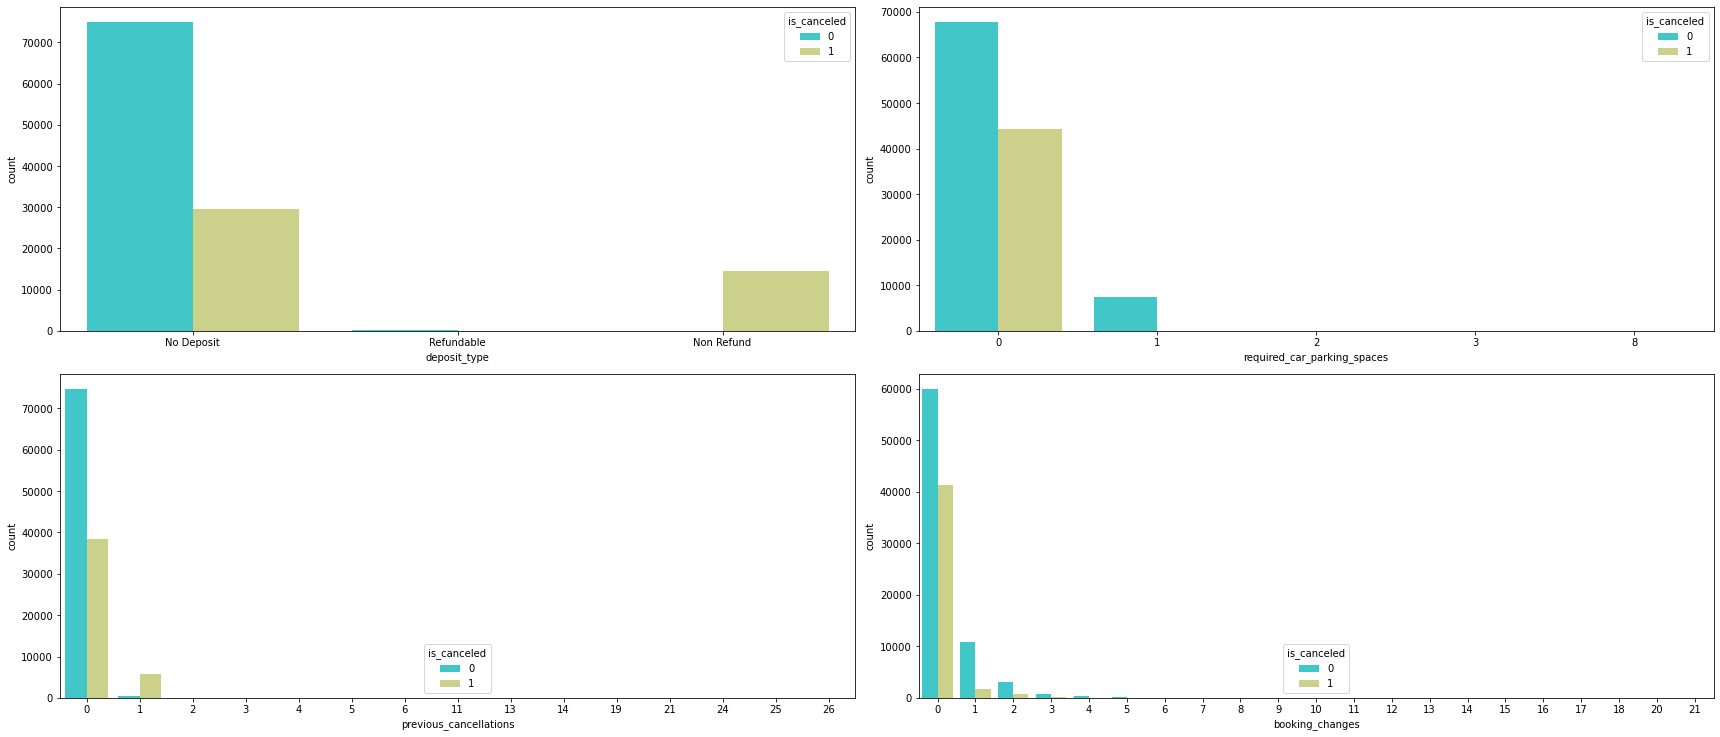

In [30]:
fig=plt.figure(figsize=(24,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='deposit_type',data=df_clean,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='required_car_parking_spaces',data=df_clean,ax=ax[1],hue='is_canceled',palette='rainbow')
sns.countplot(x='previous_cancellations',data=df_clean,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='booking_changes',data=df_clean,ax=ax[3],hue='is_canceled',palette='rainbow')
plt.tight_layout()

### Why does non-refund booking have high cancellation?
 Non-Refund bookings typically have longer lead times, and as our analysis revealed, longer lead times correlate with a higher likelihood of cancellations.

In [31]:
deposit_mean_data = df_clean.groupby("deposit_type").mean()
deposit_mean_data

is_canceled   lead_time  arrival_date_year  \
deposit_type                                               
No Deposit       0.283770   88.756615        2016.174014   
Non Refund       0.993624  212.908891        2016.031466   
Refundable       0.222222  152.098765        2016.141975   

              arrival_date_week_number  arrival_date_day_of_month  \
deposit_type                                                        
No Deposit                   27.135310                  15.814652   
Non Refund                   27.448619                  15.595462   
Refundable                   20.932099                  23.456790   

              stays_in_weekend_nights  stays_in_week_nights    adults  \
deposit_type                                                            
No Deposit                   0.970165              2.556799  1.870299   
Non Refund                   0.621718              2.091109  1.811407   
Refundable                   0.975309              2.851852  1.907407   

              children    babies  is_repeated_guest  previous_cancellations  \
deposit_type                                                                  
No Deposit    0.118395  0.009069           0.035760                0.042039   
Non Refund    0.000617  0.000000           0.004387                0.411462   
Refundable    0.030864  0.000000           0.024691                0.000000   

              previous_bookings_not_canceled  booking_changes      agent  \
deposit_type                                                               
No Deposit                          0.154911         0.249634  78.669546   
Non Refund                          0.010626         0.012477  47.480016   
Refundable                          0.018519         0.592593  56.185185   

                 company  days_in_waiting_list         adr  \
deposit_type                                                 
No Deposit     11.220478              1.519347  103.525067   
Non Refund      6.215809              7.992253   89.964017   
Refundable    133.666667              9.586420   76.209753   

              required_car_parking_spaces  total_of_special_requests  
deposit_type                                                          
No Deposit                       0.071129                   0.651427  
Non Refund                       0.000069                   0.001782  
Refundable                       0.123457                   0.141975

### Do people who book hotel well in advance tends to make more cancellation?

Scatter plots reveal a positive correlation between lead time (days between booking and arrival) and cancellation rate, suggesting longer lead times may increase cancellation likelihood.

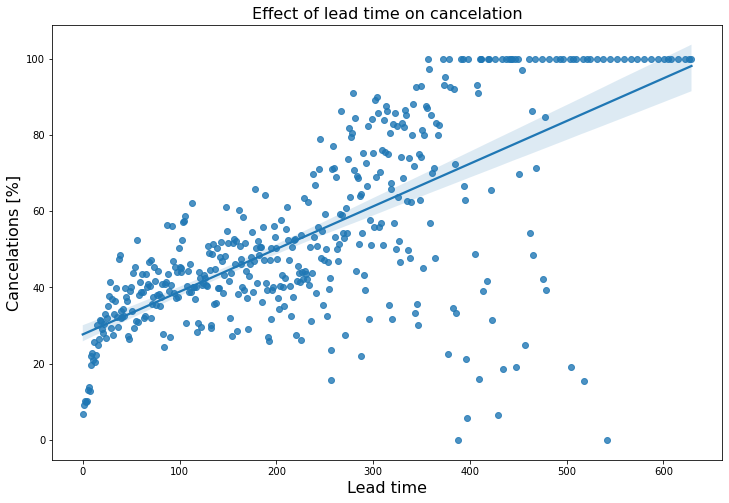

In [32]:
# group data for lead_time:
lead_cancel_data = df_clean.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]



#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

In [33]:
# check number of cancellation by deposite_type
df_clean.loc[:, ['deposit_type', 'is_canceled']].value_counts().sort_index()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
dtype: int64

In [34]:
# check number of cancellation by required_car_parking_spaces
df_clean.loc[:, ['required_car_parking_spaces', 'is_canceled']].value_counts().sort_index()

required_car_parking_spaces  is_canceled
0                            0              67750
                             1              44224
1                            0               7383
2                            0                 28
3                            0                  3
8                            0                  2
dtype: int64

### Which month experiences the highest guests activity?

The line chart illustrates seasonal occupancy trends and disparities between City and the Resort Hotel. It highlights May and October as peak seasons, with January and December showing lower guest numbers. Additionally, the City Hotel consistently display higher average guest numbers than the Resort Hotel.

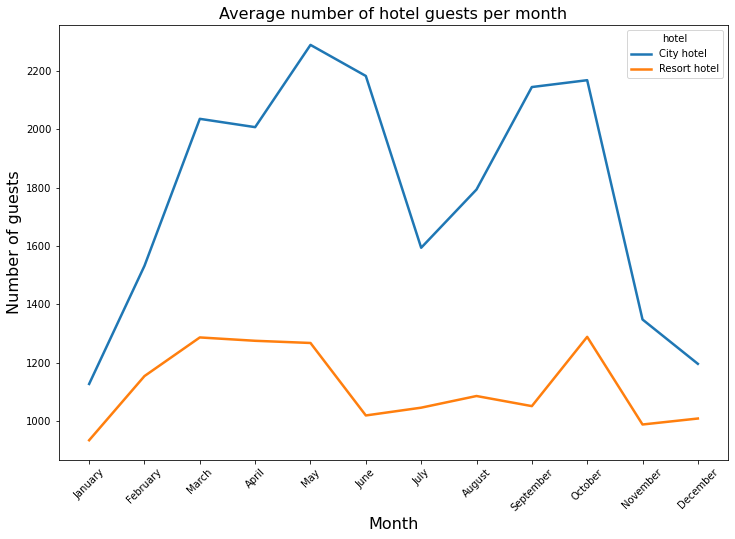

In [35]:
# Average visitors per month in each hotel
# To know the acutal visitor numbers, only bookings that were not canceled are included. 
rh = df_clean.loc[(df_clean["hotel"] == "Resort Hotel") & (df_clean["is_canceled"] == 0)]
ch = df_clean.loc[(df_clean["hotel"] == "City Hotel") & (df_clean["is_canceled"] == 0)]

# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

In [36]:
# Is booking cancellation behaviour of guests from each country different?
country_data = pd.DataFrame(df_clean["country"].value_counts())
country_data["cancel"] = df_clean.loc[df_clean["is_canceled"] == 1]["country"].value_counts()
country_data.rename(columns={"country": "total"}, inplace=True)
total_guests = country_data["total"].sum()
country_data["Guests in %"] = round(country_data["total"] / total_guests * 100, 2)
country_data["Cancellation in %"] = round(country_data["cancel"] / country_data["total"]*100, 2)

#Some countris with a few number of guests may have high cancellation, but it is not significant due to too few guests. Then, ignored contry which have less than 10 booking records.
country_data.loc[country_data["total"] < 10, "Cancellation in %"] = np.nan

country_data["country"] = country_data.index
country_data

total   cancel  Guests in %  Cancellation in % country
PRT  48590  27519.0        40.70              56.64     PRT
GBR  12129   2453.0        10.16              20.22     GBR
FRA  10415   1934.0         8.72              18.57     FRA
ESP   8568   2177.0         7.18              25.41     ESP
DEU   7287   1218.0         6.10              16.71     DEU
..     ...      ...          ...                ...     ...
DJI      1      NaN         0.00                NaN     DJI
BWA      1      NaN         0.00                NaN     BWA
HND      1      1.0         0.00                NaN     HND
VGB      1      1.0         0.00                NaN     VGB
NAM      1      NaN         0.00                NaN     NAM

[178 rows x 5 columns]

### Where do most of our hotel guests comes from?
The majority of customers are domestic Portugal (PRT) with 40.7%, followed by Great Britain and France with 10.2% and 8.7% respectively.

In [37]:
# show proportion of guest from each contry on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### Does the origin of guests impact cancellation propensities?
The cancellation behaviour varies by country, with most European countries having less than a 40% cancellation rate while Asian countries exhibit a rate higher than 40%.

In [38]:
# show cancellation rate by guest from each contry on map (ignore country which has less than 10 booking records)
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Cancellation in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### Does type of room have different price structure?

The box plot displays varying daily rates across room types and hotel categories, with the City Hotel generally having higher rates for room types A, D, E, G, and F than the Resort Hotel. Furthermore, these rates show less variance in the City Hotel compared to resorts.

<Axes: xlabel='reserved_room_type', ylabel='adr'>

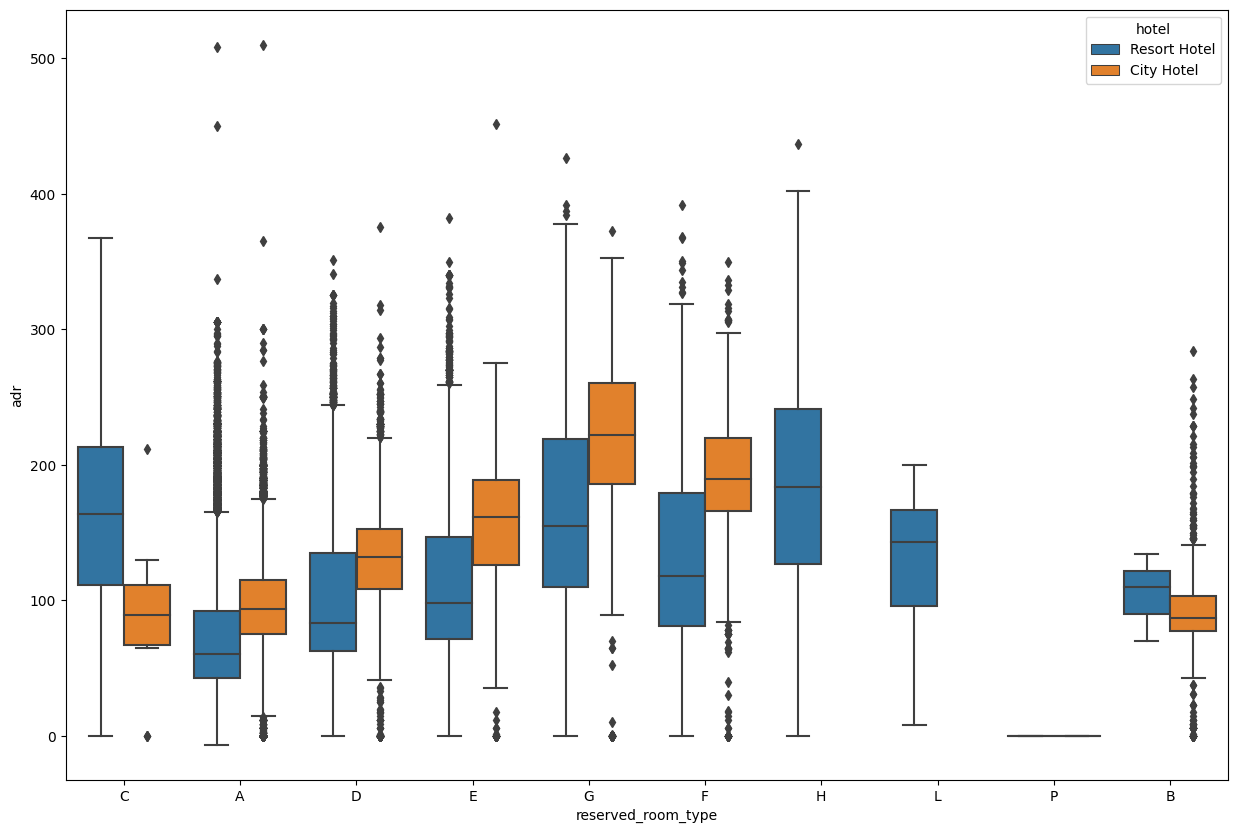

In [99]:
#Exclude outlier
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='reserved_room_type',y='adr',data=df[df['adr']< 5000],hue='hotel')

#Price depends on the room type one selects and also varies with the hotel

### Do the people who cancel booked the room with different price?

People who cancelled their bookings tend to have a higher average daily rate (ADR) compared to those who did not cancel, across different types of deposit.

<Axes: xlabel='deposit_type', ylabel='adr'>

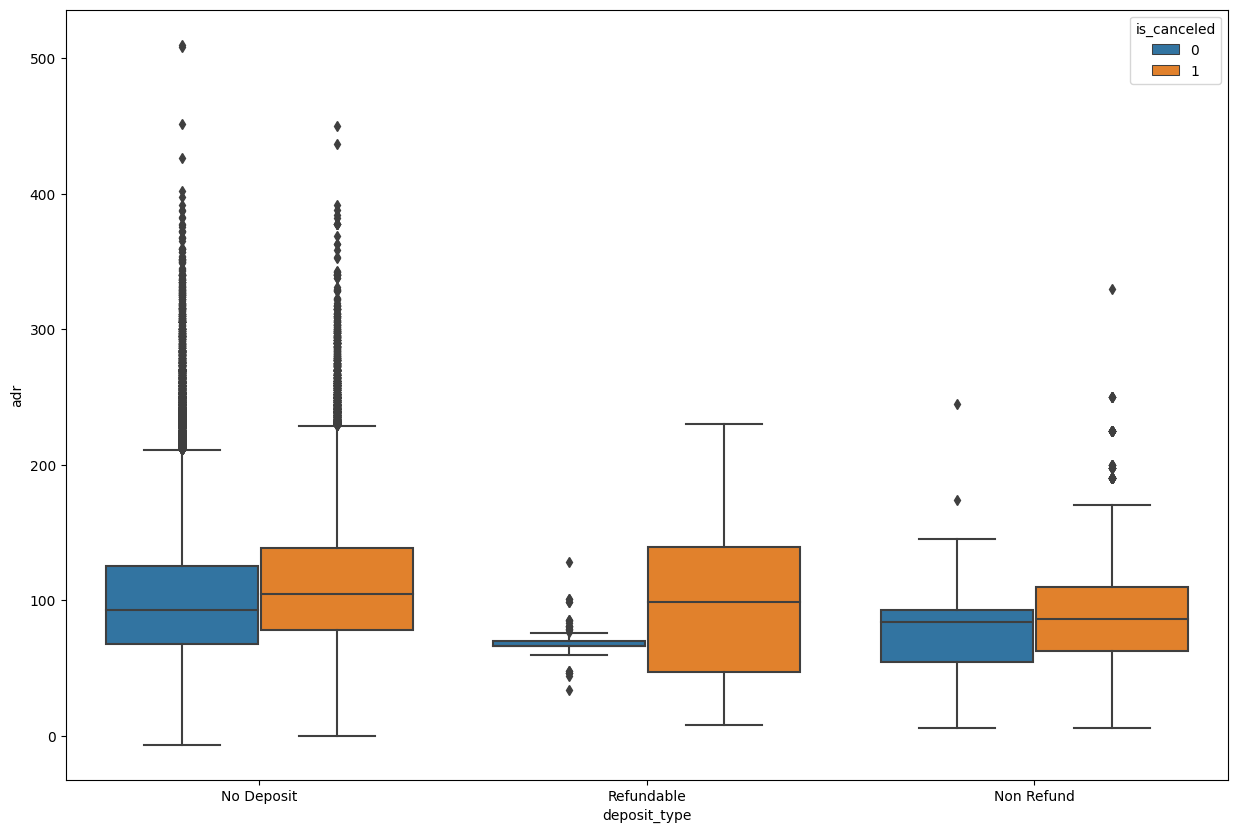

In [66]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='deposit_type',y='adr',data=df[df['adr']< 5000],hue='is_canceled')

#Price depends on the room type one selects and also varies with the hotel

# Data Preprocessing

In [67]:
df_clean.shape

(119390, 32)

### 1. Deleting Data
For consistency, we removed data from July and August 2015 to avoid an imbalance caused by an extended period in those months.

In [68]:
# Use full two years data from September 2015 to August 2017
# Drop rows where arrival_date_year is 2015 and arrival_date_month is July or August to
df_clean = df_clean.loc[~((df['arrival_date_year'] == 2015) & (df['arrival_date_month'].isin(['July', 'August'])))]

# Print the updated DataFrame
print(df_clean)

               hotel  is_canceled  lead_time  arrival_date_year  \
1485    Resort Hotel            1         38               2015   
1486    Resort Hotel            1         47               2015   
1487    Resort Hotel            0         48               2015   
1488    Resort Hotel            0         48               2015   
1489    Resort Hotel            0         27               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
1485            September                        36   
1486            September                        36   
1487            September     

In [35]:
# Check is adr equals or less than 0 since price should be positive.
(df_clean['adr']<=0).value_counts()

False    110922
True       1803
Name: adr, dtype: int64

### 2. Adjusting unusual data

ADR values should be positive, hence, non-positive values were replaced based on criteria including hotel type, room type, and meal. If those criteria were not applicable, the replacement was based on hotel and room type, and if necessary, on hotel alone. 

*ADR is an Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.


In [36]:
# make adr equals or less than 0 to be null before replacing
df_clean['adr'] = np.where(df_clean['adr'] <= 0, np.nan, df_clean['adr'])

# Replace adr NaN with mean hotel, reserved_room_type, meal but if cannot find then considering 'hotel', 'reserved_room_type' or only hotel instead.
df_clean['adr'] = df_clean.groupby(['hotel', 'reserved_room_type', 'meal']).adr.transform(lambda x: x.fillna(x.mean()))
df_clean['adr'] = df_clean.groupby(['hotel', 'reserved_room_type']).adr.transform(lambda x: x.fillna(x.mean()))
df_clean['adr'] = df_clean.groupby(['hotel']).adr.transform(lambda x: x.fillna(x.mean()))
df_clean.adr = df_clean.adr.round(2)
df_clean.adr.head()

1485    123.00
1486     98.00
1487    151.00
1488    134.67
1489    153.00
Name: adr, dtype: float64

In [37]:
# Check null values
df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 3. Feature Creation

3.1 Numerical Features

Total_children : a combined count of children and babies, offering a comprehensive view of family composition.

Total_guest : summarises the total number of adults, children, and babies, providing an overall measure of the party size.

Total_stay : combines the stays in weekend nights (‘stays_in_weekend_nights’) and stays in week nights (‘stays_in_week_nights’)

<br>

3.2 Categorical Features

Family : 0 if have no neither children nor baby, 1 if at least 1 children or baby

Weekend_or_weekday : 1 stays only weekdays, 2 stays only weekends, 3 stays during both weekdays and weekends

Required_car_parking_spaces : 0 no car parking space requirement, 1 at least 1 car parking space requirement/////



In [38]:
# Combine children and babies 
df_clean['total_children'] = df_clean['children'] + df_clean['babies']

# Combine adult and total_children 
df_clean['total_guest'] = df_clean['adults'] + df_clean['total_children']

# # Set the condition for changing the values
condition_fam = df_clean['total_children'] > 0

# Change the values to 1 or 0 based on the condition
df_clean['family'] = np.where(condition_fam, 1, 0)
df_clean = df_clean.drop(['children', 'babies'], axis=1)

In [39]:
def weekend_or_weekday(row):
    if row['stays_in_weekend_nights'] == 0 and  row['stays_in_week_nights'] > 0: 
        val = 1 #only weekday
    elif row['stays_in_weekend_nights'] > 0 and row['stays_in_week_nights'] == 0:
        val = 2 #only weekend
    elif row['stays_in_weekend_nights'] > 0 and row['stays_in_week_nights'] > 0:
        val = 3 #both weekday and weekend
    elif row['stays_in_weekend_nights'] == 0 and row['stays_in_week_nights'] == 0:
        val = 4
    return val

df_clean['weekend_or_weekday'] = df_clean.apply(weekend_or_weekday, axis = 1)
df_clean['total_stay'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

In [42]:
# Set the condition for changing the values
condition = df_clean['required_car_parking_spaces'] > 0

# Change the values to 1 or 0 based on the condition
df_clean['required_car_parking_spaces'] = np.where(condition, 1, 0)

### 4. Removing Anomalies
We eliminated 675 rows with a total_stay of zero, as it seemed inconsistent with typical hotel bookings.

In [40]:
df_clean = df_clean[df_clean['weekend_or_weekday'] != 4]

### 5. Column Removal

We reduced dimensionality by dropping irrelevant or redundant information to streamline the dataset and improve model efficiency.

| No. | Column                  | Reason to drop                                                                                     |
|-----|-------------------------|----------------------------------------------------------------------------------------------------|
| 1   | arrival_date_year       | A limited range of years may not generalise well to predict outcomes for future years or data from different time periods. |
| 2   | assigned_room_type      | This feature will know the value after guest check-in, then it should not be used to predict cancellation.                    |
| 3   | company                 | Too many missing values (94%)                                                                      |
| 4   | agent                   | Many missing values (13%)                                                                          |
| 5   | reservation_status      | This feature will know the value after guest check-in or cancel, then it should not be used to predict cancellation.          |
| 6   | reservation_status_date | This feature will know the value after guest check-in or cancel, then it should not be used to predict cancellation.          |
| 7   | arrival_date_week_number| Relevant to arrival_date_month                                                                     |
| 8   | children                | Newly created column called “Total_children” represents both children and babies                    |
| 9   | babies                | Newly created column called “Total_children” represents both children and babies                    |


In [41]:
# dropping columns that are not useful
useless_col = ['arrival_date_year', 'assigned_room_type', 'company',
               'reservation_status', 'reservation_status_date','arrival_date_week_number', 'agent']
df_clean.drop(useless_col, axis = 1, inplace = True)

In [43]:
df_clean.head()

hotel  is_canceled  lead_time arrival_date_month  \
1485  Resort Hotel            1         38          September   
1486  Resort Hotel            1         47          September   
1487  Resort Hotel            0         48          September   
1488  Resort Hotel            0         48          September   
1489  Resort Hotel            0         27          September   

      arrival_date_day_of_month  stays_in_weekend_nights  \
1485                          1                        0   
1486                          1                        0   
1487                          1                        0   
1488                          1                        0   
1489                          1                        0   

      stays_in_week_nights  adults meal country  ... days_in_waiting_list  \
1485                     2       2   BB     PRT  ...                    0   
1486                     2       2   BB     PRT  ...                    0   
1487                     3       2   HB     PRT  ...                    0   
1488                     3       2   HB     ESP  ...                    0   
1489                     3       2   HB     PRT  ...                    0   

     customer_type     adr  required_car_parking_spaces  \
1485     Transient  123.00                            0   
1486     Transient   98.00                            0   
1487     Transient  151.00                            0   
1488     Transient  134.67                            0   
1489     Transient  153.00                            0   

      total_of_special_requests total_children  total_guest family  \
1485                          0            2.0          4.0      1   
1486                          1            0.0          2.0      0   
1487                          0            0.0          2.0      0   
1488                          1            0.0          2.0      0   
1489                          2            1.0          3.0      1   

      weekend_or_weekday total_stay  
1485                   1          2  
1486                   1          2  
1487                   1          3  
1488                   1          3  
1489                   1          3  

[5 rows x 28 columns]

In [44]:
# Count the number of occurrences of each value in the 'market_segment' column
segment_counts = df_clean['market_segment'].value_counts()

# Print the count of each value
print(segment_counts)

Online TA        54026
Offline TA/TO    22693
Groups           17675
Direct           11625
Corporate         5119
Complementary      681
Aviation           231
Name: market_segment, dtype: int64


In [45]:
# Count the number of occurrences of each value in the 'distribution_channel' column
segment_counts = df_clean['distribution_channel'].value_counts()

# Print the count of each value
print(segment_counts)

TA/TO        91823
Direct       13573
Corporate     6464
GDS            190
Name: distribution_channel, dtype: int64


In [46]:
df_clean = df_clean[df_clean['market_segment'] != 'Undefined']
df_clean = df_clean[df_clean['distribution_channel'] != 'Undefined']
df_clean.shape

(112050, 28)

In [47]:
df = df_clean
df.shape

(112050, 28)

In [48]:
# designate the categorical features as the category dtype
df["is_canceled"] = df["is_canceled"].astype("category")

In [49]:
#columns contains object
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)
len(object_columns)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']


9

In [50]:
## creating numerical and categorical dataframes
cat_cols = ['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 ]

In [51]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment  \
1485  Resort Hotel          September   BB         Direct   
1486  Resort Hotel          September   BB      Online TA   
1487  Resort Hotel          September   HB      Online TA   
1488  Resort Hotel          September   HB         Direct   
1489  Resort Hotel          September   HB         Direct   

     distribution_channel reserved_room_type deposit_type customer_type  
1485               Direct                  C   No Deposit     Transient  
1486                TA/TO                  A   No Deposit     Transient  
1487                TA/TO                  A   No Deposit     Transient  
1488               Direct                  A   No Deposit     Transient  
1489               Direct                  C   No Deposit     Transient

In [52]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

meal: 
['BB' 'HB' 'FB' 'SC']

market_segment: 
['Direct' 'Online TA' 'Offline TA/TO' 'Corporate' 'Groups' 'Complementary'
 'Aviation']

distribution_channel: 
['Direct' 'TA/TO' 'Corporate' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'B' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']



### 6. Encoding
We have applied One Hot Encoding to categorical variables and Label Encoding to the 'country' feature for better interpretation by machine learning models.
<br>

### 6.1 One-Hot Encoding

In [53]:
# Store the index
original_index = cat_df.index

# encoding categorical variables by using OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(cat_df)

# Store the original column names
original_columns = cat_df.columns

# Retrieve feature names from the original columns
feature_names = cat_encoder.get_feature_names_out(original_columns)

# Create new DataFrame with encoded data and assigned column names
cat_df_encoded = pd.DataFrame(df_cat_1hot.toarray(), index=original_index, columns=feature_names)

print(cat_df_encoded)


        hotel_City Hotel  hotel_Resort Hotel  arrival_date_month_April  \
1485                 0.0                 1.0                       0.0   
1486                 0.0                 1.0                       0.0   
1487                 0.0                 1.0                       0.0   
1488                 0.0                 1.0                       0.0   
1489                 0.0                 1.0                       0.0   
...                  ...                 ...                       ...   
119385               1.0                 0.0                       0.0   
119386               1.0                 0.0                       0.0   
119387               1.0                 0.0                       0.0   
119388               1.0                 0.0                       0.0   
119389               1.0                 0.0                       0.0   

        arrival_date_month_August  arrival_date_month_December  \
1485                          0.0            

In [54]:
cat_df_encoded.shape

(112050, 45)

In [55]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop(['is_canceled','is_repeated_guest','required_car_parking_spaces','family'], axis = 1, inplace = True)
num_df

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
1485           38                          1                        0   
1486           47                          1                        0   
1487           48                          1                        0   
1488           48                          1                        0   
1489           27                          1                        0   
...           ...                        ...                      ...   
119385         23                         30                        2   
119386        102                         31                        2   
119387         34                         31                        2   
119388        109                         31                        2   
119389        205                         29                        2   

        stays_in_week_nights  adults country  previous_cancellations  \
1485                       2       2     PRT                       0   
1486                       2       2     PRT                       0   
1487                       3       2     PRT                       0   
1488                       3       2     ESP                       0   
1489                       3       2     PRT                       0   
...                      ...     ...     ...                     ...   
119385                     5       2     BEL                       0   
119386                     5       3     FRA                       0   
119387                     5       2     DEU                       0   
119388                     5       2     GBR                       0   
119389                     7       2     DEU                       0   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
1485                                 0                0                     0   
1486                                 0                0                     0   
1487                                 0                0                     0   
1488                                 0                0                     0   
1489                                 0                0                     0   
...                                ...              ...                   ...   
119385                               0                0                     0   
119386                               0                0                     0   
119387                               0                0                     0   
119388                               0                0                     0   
119389                               0                0                     0   

           adr  total_of_special_requests  total_children  total_guest  \
1485    123.00                          0             2.0          4.0   
1486     98.00                          1             0.0          2.0   
1487    151.00                          0             0.0          2.0   
1488    134.67                          1             0.0          2.0   
1489    153.00                          2             1.0          3.0   
...        ...                        ...             ...          ...   
119385   96.14                          0             0.0          2.0   
119386  225.43                          2             0.0          3.0   
119387  157.71                          4             0.0          2.0   
119388  104.40                          0             0.0          2.0   
119389  151.20                          2             0.0          2.0   

        weekend_or_weekday  total_stay  
1485                     1           2  
1486                     1           2  
1487                     1           3  
1488                     1           3  
1489                     1           3  
...                    ...         ...  
119385                   3           7  
119386                   3           7  
119387                   3         

### 6.2 Label

In [56]:
 # En-hot coding for countries

num_df['country'] = num_df['country'].map({'PRT' : 0, 'GBR' : 1, 'USA' : 2, 'ESP' : 3, 'IRL' : 4, 'FRA' : 5, 'Unknown' : 6, 'ROU' : 7, 'NOR' : 8, 'OMN' : 9, 'ARG' : 10,
  'POL' : 11, 'DEU' : 12, 'BEL' : 13, 'CHE' : 14, 'CN' : 15, 'GRC' : 16, 'ITA' : 17, 'NLD' : 18, 'DNK' : 19, 'RUS' : 20, 'SWE' : 21, 'AUS' : 22,
  'EST' : 23, 'CZE' : 24, 'BRA' : 25, 'FIN' : 26, 'MOZ' : 27, 'BWA' : 28, 'LUX' : 29, 'SVN' : 30, 'ALB' : 31, 'IND' : 32, 'CHN' : 33, 'MEX' : 34,
  'MAR' : 35, 'UKR' : 36, 'SMR' : 37, 'LVA' : 38, 'PRI' : 39, 'SRB' : 40, 'CHL' : 41, 'AUT' : 42, 'BLR' : 43, 'LTU' : 44, 'TUR' : 45, 'ZAF' : 46,
  'AGO' : 47, 'ISR' : 48, 'CYM' : 49, 'ZMB' : 50, 'CPV' : 51, 'ZWE' : 52, 'DZA' : 53, 'KOR' : 54, 'CRI' : 55, 'HUN' : 56, 'ARE' : 57, 'TUN' : 58,
  'JAM' : 59, 'HRV' : 60, 'HKG' : 61, 'IRN' : 62, 'GEO' : 63, 'AND' : 64, 'GIB' : 65, 'URY' : 66, 'JEY' : 67, 'CAF' : 68, 'CYP' : 69, 'COL' : 70,
  'GGY' : 71, 'KWT' : 72, 'NGA' : 73, 'MDV' : 74, 'VEN' : 75, 'SVK' : 76, 'FJI' : 77, 'KAZ' : 78, 'PAK' : 79, 'IDN' : 80, 'LBN' : 81, 'PHL' : 82,
  'SEN' : 83, 'SYC' : 84, 'AZE' : 85, 'BHR' : 86, 'NZL' : 87, 'THA' : 88, 'DOM' : 89, 'MKD' : 90, 'MYS' : 91, 'ARM' : 92, 'JPN' : 93, 'LKA' : 94,
  'CUB' : 95, 'CMR' : 96, 'BIH' : 97, 'MUS' : 98, 'COM' : 99,'SUR' : 100, 'UGA' : 101, 'BGR' : 102, 'CIV' : 103, 'JOR' : 104, 'SYR' : 105, 'SGP' : 106,
  'BDI' : 107, 'SAU' : 108, 'VNM' : 109, 'PLW' : 110, 'QAT' : 111, 'EGY' : 112, 'PER' : 113, 'MLT' : 114, 'MWI' : 115, 'ECU' : 116, 'MDG' : 117, 'ISL' : 118,
  'UZB' : 119, 'NPL' : 120, 'BHS' : 121, 'MAC' : 122, 'TGO' : 123, 'TWN' : 124, 'DJI' : 125, 'STP' : 126, 'KNA' : 127, 'ETH' : 128, 'IRQ' : 129, 'HND' : 130,
  'RWA' : 131, 'KHM' : 132, 'MCO' : 133, 'BGD' : 134, 'IMN' : 135, 'TJK' : 136, 'NIC' : 137, 'BEN' : 138, 'VGB' : 139, 'TZA' : 140, 'GAB' : 141, 'GHA' : 142,
  'TMP' : 143, 'GLP' : 144, 'KEN' : 145, 'LIE' : 146, 'GNB' : 147, 'MNE' : 148, 'UMI' : 149, 'MYT' : 150, 'FRO' : 151, 'MMR' : 152, 'PAN' : 153, 'BFA' : 154,
  'LBY' : 155, 'MLI' : 156, 'NAM' : 157, 'BOL' : 158, 'PRY' : 159, 'BRB' : 160, 'ABW' : 161, 'AIA' : 162, 'SLV' : 163, 'DMA' : 164, 'PYF' : 165, 'GUY' : 166,
  'LCA' : 167, 'ATA' : 168, 'GTM' : 169, 'ASM' : 170, 'MRT' : 171, 'NCL' : 172, 'KIR' : 173, 'SDN' : 174, 'ATF' : 175, 'SLE' : 176, 'LAO' : 177})

### 7. Scaling
We utilised StandardScaler to transform numerical features to a standard scale, ensuring fair comparisons between different features and preventing any single feature from dominating the analysis.

In [57]:
# Scaling datasets by using sklearn StandardScaler
# Machine learning algorithms work best when all variables are on the same scale

scale = StandardScaler()

# scale only numeric variables
num_df_scale = scale.fit_transform(num_df) 
# transforms matrix back to a dataframe
num_df_sc = pd.DataFrame(num_df_scale, columns=num_df.columns, index=num_df.index) 
num_df_sc.describe().round(2) 

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
count  112050.00                  112050.00                112050.00   
mean       -0.00                      -0.00                     0.00   
std         1.00                       1.00                     1.00   
min        -0.97                      -1.68                    -0.93   
25%        -0.80                      -0.89                    -0.93   
50%        -0.32                       0.02                     0.08   
75%         0.52                       0.82                     1.08   
max         5.65                       1.73                    18.15   

       stays_in_week_nights     adults    country  previous_cancellations  \
count             112050.00  112050.00  112050.00               112050.00   
mean                  -0.00       0.00      -0.00                   -0.00   
std                    1.00       1.00       1.00                    1.00   
min                   -1.32      -1.48      -0.52                   -0.09   
25%                   -0.79       0.24      -0.52                   -0.09   
50%                   -0.27       0.24      -0.39                   -0.09   
75%                    0.26       0.24       0.26                   -0.09   
max                   25.05      91.72      11.01                   32.91   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                       112050.00        112050.00             112050.00   
mean                             0.00             0.00                  0.00   
std                              1.00             1.00                  1.00   
min                             -0.09            -0.34                 -0.14   
25%                             -0.09            -0.34                 -0.14   
50%                             -0.09            -0.34                 -0.14   
75%                             -0.09            -0.34                 -0.14   
max                             46.56            31.65                 21.41   

             adr  total_of_special_requests  total_children  total_guest  \
count  112050.00                  112050.00       112050.00    112050.00   
mean        0.00                       0.00           -0.00        -0.00   
std         1.00                       1.00            1.00         1.00   
min        -2.10                      -0.73           -0.27        -1.33   
25%        -0.65                      -0.73           -0.27         0.04   
50%        -0.17                      -0.73           -0.27         0.04   
75%         0.46                       0.54           -0.27         0.04   
max       107.49                       5.58           24.02        72.43   

       weekend_or_weekday  total_stay  
count           112050.00   112050.00  
mean                 0.00        0.00  
std                  1.00        1.00  
min                 -1.11       -0.96  
25%                 -1.11       -0.56  
50%                  0.96       -0.17  
75%                  0.96        0.23  
max                  0.96       25.83

In [58]:
num_df_sc.head()

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
1485  -0.617839                  -1.680908                -0.928987   
1486  -0.533703                  -1.680908                -0.928987   
1487  -0.524354                  -1.680908                -0.928987   
1488  -0.524354                  -1.680908                -0.928987   
1489  -0.720671                  -1.680908                -0.928987   

      stays_in_week_nights    adults   country  previous_cancellations  \
1485             -0.265161  0.243591 -0.522847               -0.093286   
1486             -0.265161  0.243591 -0.522847               -0.093286   
1487              0.262149  0.243591 -0.522847               -0.093286   
1488              0.262149  0.243591 -0.327330               -0.093286   
1489              0.262149  0.243591 -0.522847               -0.093286   

      previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
1485                       -0.093795        -0.341009             -0.136222   
1486                       -0.093795        -0.341009             -0.136222   
1487                       -0.093795        -0.341009             -0.136222   
1488                       -0.093795        -0.341009             -0.136222   
1489                       -0.093795        -0.341009             -0.136222   

           adr  total_of_special_requests  total_children  total_guest  \
1485  0.395698                  -0.726146        4.587473     2.772020   
1486 -0.111663                   0.535830       -0.271435     0.040167   
1487  0.963943                  -0.726146       -0.271435     0.040167   
1488  0.632535                   0.535830       -0.271435     0.040167   
1489  1.004532                   1.797806        2.158019     1.406094   

      weekend_or_weekday  total_stay  
1485           -1.107119   -0.562584  
1486           -1.107119   -0.562584  
1487           -1.107119   -0.168641  
1488           -1.107119   -0.168641  
1489           -1.107119   -0.168641

In [59]:
bi_df = df[['is_repeated_guest', 'required_car_parking_spaces','family']]
bi_df.shape

(112050, 3)

In [60]:
X = pd.concat([num_df_sc,bi_df,cat_df_encoded], axis = 1)
y = df['is_canceled']

In [61]:
X

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
1485    -0.617839                  -1.680908                -0.928987   
1486    -0.533703                  -1.680908                -0.928987   
1487    -0.524354                  -1.680908                -0.928987   
1488    -0.524354                  -1.680908                -0.928987   
1489    -0.720671                  -1.680908                -0.928987   
...           ...                        ...                      ...   
119385  -0.758065                   1.616031                 1.079134   
119386  -0.019540                   1.729719                 1.079134   
119387  -0.655232                   1.729719                 1.079134   
119388   0.045899                   1.729719                 1.079134   
119389   0.943347                   1.502344                 1.079134   

        stays_in_week_nights    adults   country  previous_cancellations  \
1485               -0.265161  0.243591 -0.522847               -0.093286   
1486               -0.265161  0.243591 -0.522847               -0.093286   
1487                0.262149  0.243591 -0.522847               -0.093286   
1488                0.262149  0.243591 -0.327330               -0.093286   
1489                0.262149  0.243591 -0.522847               -0.093286   
...                      ...       ...       ...                     ...   
119385              1.316767  0.243591  0.324394               -0.093286   
119386              1.316767  1.969550 -0.196985               -0.093286   
119387              1.316767  0.243591  0.259222               -0.093286   
119388              1.316767  0.243591 -0.457675               -0.093286   
119389              2.371386  0.243591  0.259222               -0.093286   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
1485                         -0.093795        -0.341009             -0.136222   
1486                         -0.093795        -0.341009             -0.136222   
1487                         -0.093795        -0.341009             -0.136222   
1488                         -0.093795        -0.341009             -0.136222   
1489                         -0.093795        -0.341009             -0.136222   
...                                ...              ...                   ...   
119385                       -0.093795        -0.341009             -0.136222   
119386                       -0.093795        -0.341009             -0.136222   
119387                       -0.093795        -0.341009             -0.136222   
119388                       -0.093795        -0.341009             -0.136222   
119389                       -0.093795        -0.341009             -0.136222   

        ...  reserved_room_type_G  reserved_room_type_H  reserved_room_type_P  \
1485    ...                   0.0                   0.0                   0.0   
1486    ...                   0.0                   0.0                   0.0   
1487    ...                   0.0                   0.0                   0.0   
1488    ...                   0.0                   0.0                   0.0   
1489    ...                   0.0                   0.0                   0.0   
...     ...                   ...                   ...                   ...   
119385  ...                   0.0                   0.0                   0.0   
119386  ...                   0.0                   0.0                   0.0   
119387  ...                   0.0                   0.0                   0.0   
119388  ...                   0.0                   0.0                   0.0   
119389  ...                   0.0                   0.0                   0.0   

        deposit_type_No Deposit  deposit_type_Non Refund  \
1485                        1.0                      0.0   
1486                        1.0                      0.0   
1487                        1.0                      0.0   
1488                        1.0 

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112050 entries, 1485 to 119389
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       112050 non-null  float64
 1   arrival_date_day_of_month       112050 non-null  float64
 2   stays_in_weekend_nights         112050 non-null  float64
 3   stays_in_week_nights            112050 non-null  float64
 4   adults                          112050 non-null  float64
 5   country                         112050 non-null  float64
 6   previous_cancellations          112050 non-null  float64
 7   previous_bookings_not_canceled  112050 non-null  float64
 8   booking_changes                 112050 non-null  float64
 9   days_in_waiting_list            112050 non-null  float64
 10  adr                             112050 non-null  float64
 11  total_of_special_requests       112050 non-null  float64
 12  total_childre

In [63]:
y

1485      1
1486      1
1487      0
1488      0
1489      0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 112050, dtype: category
Categories (2, int64): [0, 1]

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112050 entries, 1485 to 119389
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       112050 non-null  float64
 1   arrival_date_day_of_month       112050 non-null  float64
 2   stays_in_weekend_nights         112050 non-null  float64
 3   stays_in_week_nights            112050 non-null  float64
 4   adults                          112050 non-null  float64
 5   country                         112050 non-null  float64
 6   previous_cancellations          112050 non-null  float64
 7   previous_bookings_not_canceled  112050 non-null  float64
 8   booking_changes                 112050 non-null  float64
 9   days_in_waiting_list            112050 non-null  float64
 10  adr                             112050 non-null  float64
 11  total_of_special_requests       112050 non-null  float64
 12  total_childre

In [65]:
X.shape, y.shape

((112050, 64), (112050,))

In [66]:
# Create a testing and a training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78435, 64), (78435,), (33615, 64), (33615,))

In [67]:
X_train.head()

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
64557  -0.486961                  -0.316657                 0.075074   
70443  -0.907639                   0.138093                 0.075074   
4451   -0.804807                   0.365468                -0.928987   
31929  -0.973078                  -0.544032                -0.928987   
61854   0.859211                   1.274968                 0.075074   

       stays_in_week_nights    adults   country  previous_cancellations  \
64557             -0.792470 -1.482369 -0.522847               -0.093286   
70443             -0.792470  0.243591 -0.522847               -0.093286   
4451              -0.792470  0.243591 -0.522847               -0.093286   
31929             -0.792470  0.243591 -0.457675               -0.093286   
61854              1.316767  0.243591 -0.457675               -0.093286   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
64557                       -0.093795        -0.341009             -0.136222   
70443                       -0.093795        -0.341009             -0.136222   
4451                        -0.093795        -0.341009             -0.136222   
31929                       -0.093795        -0.341009             -0.136222   
61854                       -0.093795        -0.341009             -0.136222   

       ...  reserved_room_type_G  reserved_room_type_H  reserved_room_type_P  \
64557  ...                   0.0                   0.0                   0.0   
70443  ...                   0.0                   0.0                   0.0   
4451   ...                   0.0                   0.0                   0.0   
31929  ...                   0.0                   0.0                   0.0   
61854  ...                   0.0                   0.0                   0.0   

       deposit_type_No Deposit  deposit_type_Non Refund  \
64557                      0.0                      1.0   
70443                      1.0                      0.0   
4451                       1.0                      0.0   
31929                      1.0                      0.0   
61854                      1.0                      0.0   

       deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
64557                      0.0                     0.0                  0.0   
70443                      0.0                     0.0                  0.0   
4451                       0.0                     0.0                  0.0   
31929                      0.0                     0.0                  0.0   
61854                      0.0                     0.0                  0.0   

       customer_type_Transient  customer_type_Transient-Party  
64557                      1.0                            0.0  
70443                      1.0                            0.0  
4451                       1.0                            0.0  
31929                      1.0                            0.0  
61854                      1.0                            0.0  

[5 rows x 64 columns]

In [68]:
X_test.head()

lead_time  arrival_date_day_of_month  stays_in_weekend_nights  \
43186   -0.692626                   0.024406                -0.928987   
58916    4.682713                   0.138093                 0.075074   
49849    1.550994                   0.479156                -0.928987   
109400   0.298306                  -1.339845                 1.079134   
92580   -0.290644                  -1.112470                -0.928987   

        stays_in_week_nights    adults   country  previous_cancellations  \
43186              -0.265161 -1.482369 -0.522847               -0.093286   
58916              -0.265161  0.243591 -0.522847               -0.093286   
49849               0.789458  0.243591 -0.522847               -0.093286   
109400              1.316767  0.243591 -0.196985               -0.093286   
92580               0.262149  0.243591 -0.196985               -0.093286   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
43186                        -0.093795        -0.341009             -0.136222   
58916                        -0.093795        -0.341009             -0.136222   
49849                        -0.093795        -0.341009             10.167268   
109400                       -0.093795         2.705435             -0.136222   
92580                        -0.093795        -0.341009             -0.136222   

        ...  reserved_room_type_G  reserved_room_type_H  reserved_room_type_P  \
43186   ...                   0.0                   0.0                   0.0   
58916   ...                   0.0                   0.0                   0.0   
49849   ...                   0.0                   0.0                   0.0   
109400  ...                   0.0                   0.0                   0.0   
92580   ...                   0.0                   0.0                   0.0   

        deposit_type_No Deposit  deposit_type_Non Refund  \
43186                       1.0                      0.0   
58916                       0.0                      1.0   
49849                       1.0                      0.0   
109400                      1.0                      0.0   
92580                       1.0                      0.0   

        deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
43186                       0.0                     0.0                  0.0   
58916                       0.0                     0.0                  0.0   
49849                       0.0                     0.0                  0.0   
109400                      0.0                     0.0                  0.0   
92580                       0.0                     0.0                  0.0   

        customer_type_Transient  customer_type_Transient-Party  
43186                       1.0                            0.0  
58916                       1.0                            0.0  
49849                       0.0                            1.0  
109400                      1.0                            0.0  
92580                       1.0                            0.0  

[5 rows x 64 columns]

In [69]:
y_train.head(), y_test.head()

(64557    1
 70443    1
 4451     1
 31929    0
 61854    1
 Name: is_canceled, dtype: category
 Categories (2, int64): [0, 1],
 43186     0
 58916     1
 49849     1
 109400    0
 92580     0
 Name: is_canceled, dtype: category
 Categories (2, int64): [0, 1])

# Classification Models

# Naive expectation

This rudimentary model assumes no bookings are cancelled and yields an accuracy of around 63.11%. It establishes a performance benchmark for predictive models.

In [125]:
df_naive = df.copy()

In [134]:
#   What is booking cancellation expectation without any knowledge

df_naive["is_canceled"] = df_naive["is_canceled"].astype("int")
1-df_naive['is_canceled'].mean()
# # in the dataset 1 is cancelled and 0 is not cancelled. In our dataset 36.9% of the bookings were cancelled
# So our naive expectation is that a model with no knowledge would predict that every booking were not cancelled, and be 63.1% accurate

#cancelled = 1
#not cancelled = 0

0.6311289602855867

# Logistic Regression

A base model achieving about 80.53% accuracy and a balanced F1-score of 69.18%. Despite its promise, complex algorithms might enhance its performance.

In [71]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
scores = cross_val_score(log_reg, X_train, y_train, cv=5)
y_pred=log_reg.predict(X_test)

print(classification_report(y_test,y_pred))

log_reg_model_accuracy = accuracy_score(y_test, y_pred)
log_reg_model_precision = precision_score(y_test, y_pred)
log_reg_model_recall = recall_score(y_test, y_pred)
log_reg_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", log_reg_model_accuracy)
print("Precision:", log_reg_model_precision)
print("Recall:", log_reg_model_recall)
print("F1-score:", log_reg_model_f1)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     21229
           1       0.83      0.59      0.69     12386

    accuracy                           0.81     33615
   macro avg       0.81      0.76      0.77     33615
weighted avg       0.81      0.81      0.80     33615

Accuracy: 0.8052655064703258
Precision: 0.8298689561680976
Recall: 0.5930889714193445
F1-score: 0.6917788869008381


# XGBClassifier

To train the XGBoost classification model, hyperparameters are set for tuning in three scenarios for learning_rate (0.1, 0.01, 0.001), max_depth (3, 5, 7) and n_estimators (100, 200, 300). Using grid search with 5-fold cross-validation, the hyperparameters 'learning_rate': 0.1, 'max_depth': 7, and 'n_estimators': 300 were tuned, resulting in the best performance. In these scenarios, an accuracy of 86.41% and an F1-score of 80.72% were achieved.


In [116]:
# XGBClassifier
xgb_model=xgb.XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with the best parameters using cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Obtain the predictions from the best model on the test data
y_pred = best_model.predict(X_test)

xgboost_model_accuracy = accuracy_score(y_test, y_pred)
xgboost_model_precision = precision_score(y_test, y_pred)
xgboost_model_recall = recall_score(y_test, y_pred)
xgboost_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(classification_report(y_test,y_pred))
print("Accuracy:", xgboost_model_accuracy)
print("Precision:", xgboost_model_precision)
print("Recall:", xgboost_model_recall)
print("F1-score:", xgboost_model_f1)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.8650936786243781
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     21229
           1       0.85      0.77      0.81     12386

    accuracy                           0.86     33615
   macro avg       0.86      0.84      0.85     33615
weighted avg       0.86      0.86      0.86     33615

Accuracy: 0.8641082849918191
Precision: 0.8458067940552016
Recall: 0.771919909575327
F1-score: 0.807176023638666


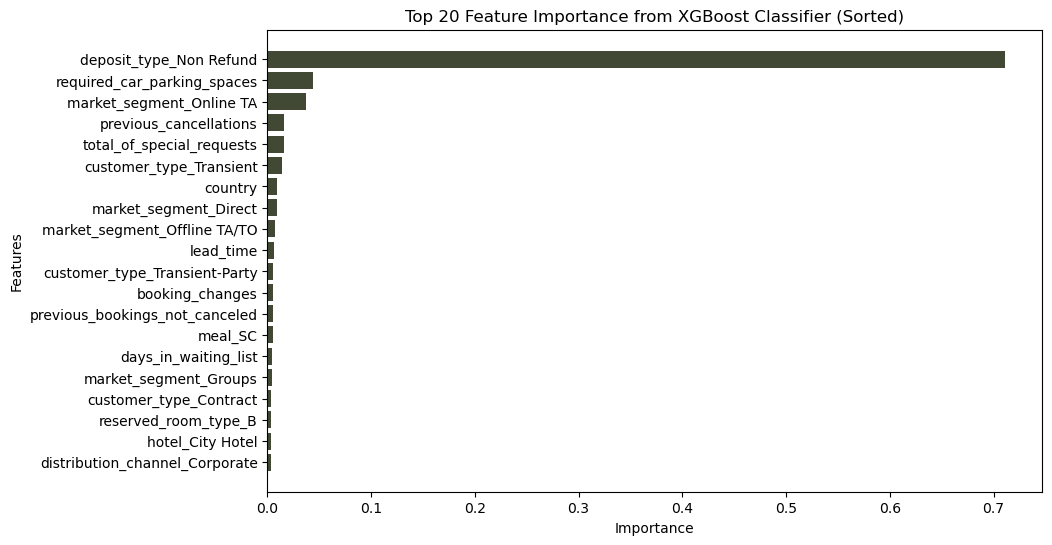

In [117]:
# Plot feature importance from XGBClassifier
# Get feature importance
importance = best_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = importance.argsort()[::-1]
top_sorted_idx = sorted_idx[:20]
top_features = feature_names[top_sorted_idx]
top_importance = importance[top_sorted_idx]

# Sort top_importance in ascending order
sorted_indices = top_importance.argsort()
top_features_sorted = top_features[sorted_indices]
top_importance_sorted = top_importance[sorted_indices]

# Plot top 20 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_sorted)), top_importance_sorted, align='center', color = '#414833')
plt.yticks(range(len(top_features_sorted)), top_features_sorted)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance from XGBoost Classifier (Sorted)')
plt.show()


# Decision Tree

This model achieved an accuracy rate of 84.48% and F1-score of 77.89%, surpassing the baseline. However, the complexity of the dataset, especially after transforming categorical variables into dummy variables, might cause interpretation difficulty.

In [74]:
# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt_train = dt.fit(X_train, y_train)
# Prediction wothout the fine-turn and cutting the features
dt_pred = dt.predict(X_test)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

dt_model_accuracy = accuracy_score(y_test, dt_best.predict(X_test))
dt_model_precision = precision_score(y_test, dt_best.predict(X_test))
dt_model_recall = recall_score(y_test, dt_best.predict(X_test))
dt_model_f1 = f1_score(y_test, dt_best.predict(X_test))

# Print the evaluation metrics
print(classification_report(y_test,y_pred))
print("Accuracy:", dt_model_accuracy)
print("Precision:", dt_model_precision)
print("Recall:", dt_model_recall)
print("F1-score:", dt_model_f1)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}
Best Score: 0.8398802138207506
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     21229
           1       0.85      0.77      0.81     12386

    accuracy                           0.87     33615
   macro avg       0.86      0.85      0.85     33615
weighted avg       0.86      0.87      0.86     33615

Accuracy: 0.8447716793098319
Precision: 0.8194865394901052
Recall: 0.7422089455837235
F1-score: 0.7789357735976953


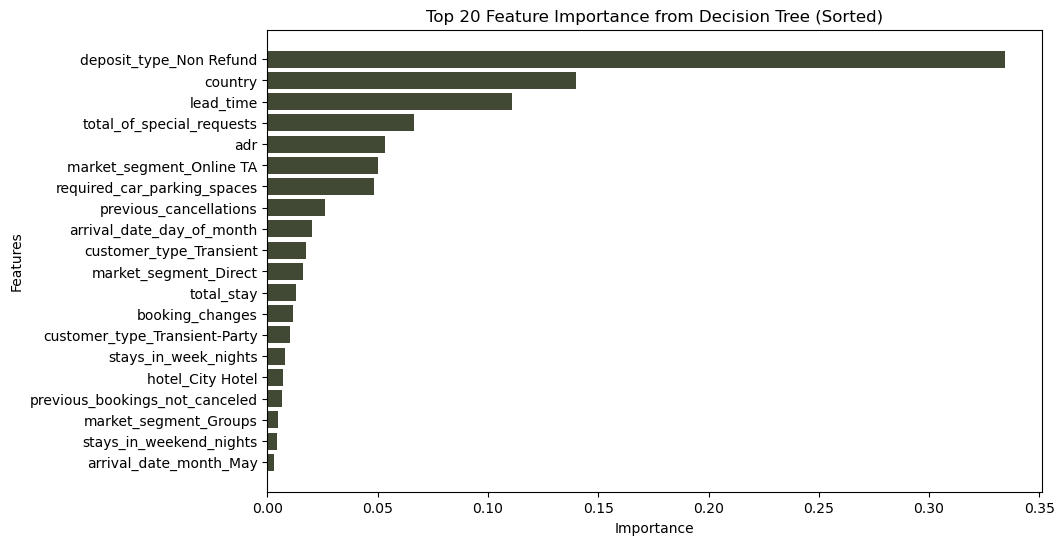

In [75]:
# Check the importance of the variables
# Get feature importance
importance_dt= dt_best.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = importance_dt.argsort()[::-1]
top_sorted_idx = sorted_idx[:20]
top_features = feature_names[top_sorted_idx]
top_importance = importance_dt[top_sorted_idx]

# Sort top_importance in ascending order
sorted_indices = top_importance.argsort()
top_features_sorted = top_features[sorted_indices]
top_importance_sorted = top_importance[sorted_indices]

# Plot top 20 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_sorted)), top_importance_sorted, align='center', color = '#414833')
plt.yticks(range(len(top_features_sorted)), top_features_sorted)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance from Decision Tree (Sorted)')
plt.show()

# Random Forest

With an accuracy of 87.63% and F1-score of 82.31%, the Random Forest Classifier model demonstrated a strong predictive capacity for booking cancellations. Its method of using an ensemble of decision trees mitigates overfitting and enhances generalisation. It is the model that has the best accuracy to predict hotel cancellation.

In [76]:
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)
print('Best Hyperparameters:', best_params)

rf_model_accuracy = accuracy_score(y_test, y_pred)
rf_model_precision = precision_score(y_test, y_pred)
rf_model_recall = recall_score(y_test, y_pred)
rf_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(classification_report(y_test,y_pred))
print("Accuracy:", rf_model_accuracy)
print("Precision:", rf_model_precision)
print("Recall:", rf_model_recall)
print("F1-score:", rf_model_f1)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     21229
           1       0.87      0.78      0.82     12386

    accuracy                           0.88     33615
   macro avg       0.87      0.86      0.86     33615
weighted avg       0.88      0.88      0.87     33615

Accuracy: 0.8763349695076603
Precision: 0.8704420635635185
Recall: 0.7805586953011464
F1-score: 0.8230536755629336


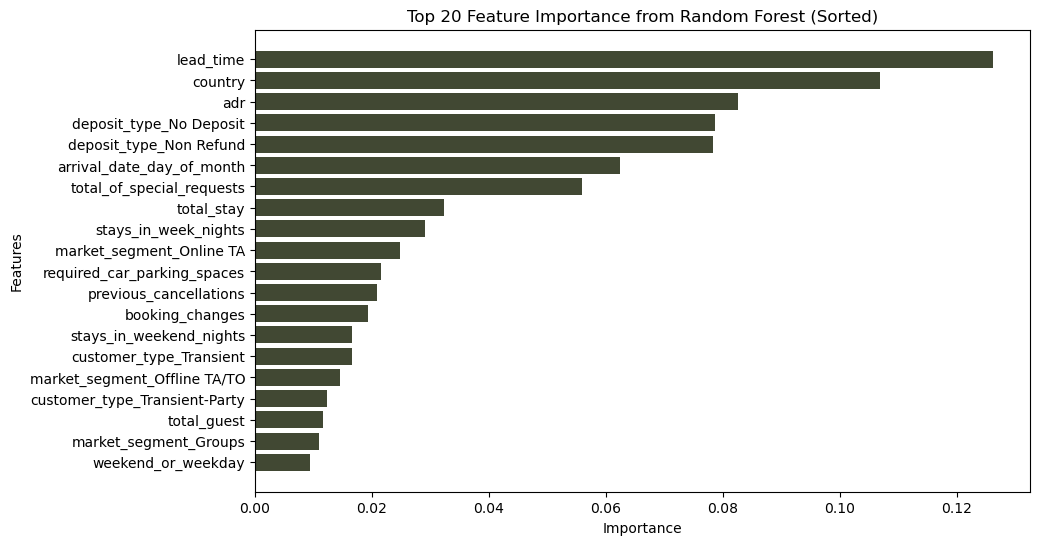

In [110]:
# Plot feature importance from Random Forest
# Get feature importance
importance = best_rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importance in descending order
sorted_idx = importance.argsort()[::-1]
top_sorted_idx = sorted_idx[:20]
top_features = feature_names[top_sorted_idx]
top_importance = importance[top_sorted_idx]

# Sort top_importance in ascending order
sorted_indices = top_importance.argsort()
top_features_sorted = top_features[sorted_indices]
top_importance_sorted = top_importance[sorted_indices]

# Plot top 20 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_sorted)), top_importance_sorted, align='center', color = '#414833')
plt.yticks(range(len(top_features_sorted)), top_features_sorted)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance from Random Forest (Sorted)')
plt.show()


From the random forest model, "Lead_time" stands out as the most important feature, indicating that the duration between booking and arrival significantly impacts cancellation likelihood. Additionally, "country" reveals that the origin of customers plays a role, suggesting that certain nationalities may have different cancellation tendencies. "Adr" (average daily rate) showcases how pricing can influence cancellations. 

# SVM

The Support Vector Machine (SVM) model, effective in high-dimensional spaces and memory efficient, showed an accuracy of around 83.06% and F1-score of 73.89%, outperforming the baseline, logistic regression and providing reliable cancellation predictions.


In [78]:
# Support vector machines
svc = SVC(random_state=42)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

svm_model_accuracy = accuracy_score(y_test, y_pred)
svm_model_precision = precision_score(y_test, y_pred)
svm_model_recall = recall_score(y_test, y_pred)
svm_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(classification_report(y_test,y_pred))
print("Accuracy:", svm_model_accuracy)
print("Precision:", svm_model_precision)
print("Recall:", svm_model_recall)
print("F1-score:", svm_model_f1)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     21229
           1       0.86      0.65      0.74     12386

    accuracy                           0.83     33615
   macro avg       0.84      0.79      0.81     33615
weighted avg       0.83      0.83      0.82     33615

Accuracy: 0.830581585601666
Precision: 0.8550355513106229
Recall: 0.650492491522687
F1-score: 0.7388692741528727


# KNN Model

The K-Nearest Neighbors (KNN) model identifies 'K' closest data points in the feature space. This method assumes bookings with similar characteristics have similar cancellation probabilities. This model yielded an accuracy of approximately 80.56% and F1-score of 72.89%

In [79]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

knn_model_accuracy = accuracy_score(y_test, y_pred)
knn_model_precision = precision_score(y_test, y_pred)
knn_model_recall = recall_score(y_test, y_pred)
knn_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(classification_report(y_test,y_pred))
print("Accuracy:", knn_model_accuracy)
print("Precision:", knn_model_precision)
print("Recall:", knn_model_recall)
print("F1-score:", knn_model_f1)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     21229
           1       0.75      0.71      0.73     12386

    accuracy                           0.81     33615
   macro avg       0.79      0.79      0.79     33615
weighted avg       0.80      0.81      0.80     33615

Accuracy: 0.805562992711587
Precision: 0.7495733788395904
Recall: 0.7092685289843371
F1-score: 0.7288641831909066


# GradientBoostingClassifier

The Gradient Boost Classifier model leverages multiple decision trees to create a powerful predictive model, yielding an accuracy of about 83.6% and an F1 score around 76.4%.

In [80]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb_model = gb_model.predict(X_test)

acc_gb_model = accuracy_score(y_test, y_pred_gb_model)
conf = confusion_matrix(y_test, y_pred_gb_model)
clf_report = classification_report(y_test, y_pred_gb_model)


print(f"Classification Report : \n{clf_report}")

gb_model_accuracy = accuracy_score(y_test, y_pred_gb_model)
gb_model_precision = precision_score(y_test, y_pred_gb_model)
gb_model_recall = recall_score(y_test, y_pred_gb_model)
gb_model_f1 = f1_score(y_test, y_pred_gb_model)

# Print the evaluation metrics
print("Accuracy:", gb_model_accuracy)
print("Precision:", gb_model_precision)
print("Recall:", gb_model_recall)
print("F1-score:", gb_model_f1)

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     21229
           1       0.81      0.72      0.76     12386

    accuracy                           0.84     33615
   macro avg       0.83      0.81      0.82     33615
weighted avg       0.83      0.84      0.83     33615

Accuracy: 0.8359660865684962
Precision: 0.8133892739875958
Recall: 0.7200064589052155
F1-score: 0.7638543897216272


# Gradient Boosting Hyperparameter Tuning

Utilising Randomised Search for hyperparameter tuning, the model improved its accuracy to around 85.32%, and F1 scores to 79.07%, outperforming the base gradient boost model.

In [81]:
# Define the parameter distributions for randomized search
param_distributions = {
    'learning_rate': np.linspace(0.001, 0.1, num=10),
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform Randomized Search CV for hyperparameter tuning
gb_hpyt_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gb_hpyt_model, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best model from Randomized Search CV
best_gb_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_gb_hpyt_model = best_gb_model.predict(X_test)

# Evaluate the best model
acc_gb_hpyt_model = accuracy_score(y_test, y_pred_gb_hpyt_model)
conf = confusion_matrix(y_test, y_pred_gb_hpyt_model)
clf_report = classification_report(y_test, y_pred_gb_hpyt_model)

gb_hpyt_model_accuracy = accuracy_score(y_test, y_pred_gb_hpyt_model)
gb_hpyt_model_precision = precision_score(y_test, y_pred_gb_hpyt_model)
gb_hpyt_model_recall = recall_score(y_test, y_pred_gb_hpyt_model)
gb_hpyt_model_f1 = f1_score(y_test, y_pred_gb_hpyt_model)

# Print the evaluation metrics
print(f"Classification Report:\n{clf_report}")
print("Accuracy:", gb_hpyt_model_accuracy)
print("Precision:", gb_hpyt_model_precision)
print("Recall:", gb_hpyt_model_recall)
print("F1-score:", gb_hpyt_model_f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     21229
           1       0.83      0.75      0.79     12386

    accuracy                           0.85     33615
   macro avg       0.85      0.83      0.84     33615
weighted avg       0.85      0.85      0.85     33615

Accuracy: 0.8531607913134017
Precision: 0.8328270192994996
Recall: 0.7525431939286291
F1-score: 0.7906523029943169


# Neural Network 1

# Simple Neural Network Model

A simple Neural Network model with 7 layers including a softmax activation final layer provided the best accuracy among NN models - 85.2% with an F1-score of 78.52%.

In [82]:
# Split Train, Test, Validation Dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((58826, 64), (58826,), (33615, 64), (33615,))

In [83]:
tf.keras.backend.clear_session()

simple_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]),
    Dense(128, activation="relu"),
    Flatten(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(2, activation='softmax')
])
simple_dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [84]:
# rm -rf history

checkpoint_simple_dense = tf.keras.callbacks.ModelCheckpoint("history/simple_dense",save_best_only=True)

simple_dense_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])


                       
history_simple_dense = simple_dense_model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid,y_valid),
                    callbacks=[checkpoint_simple_dense])


simple_dense_model = tf.keras.models.load_model("history/simple_dense")
print(f"Test MAE: {simple_dense_model.evaluate(X_test, y_test)[1]:.2f}")

Epoch 1/30


2023-07-13 13:43:45.836130: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1819/1839 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.8017

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8016 - val_loss: 0.3861 - val_accuracy: 0.8119
Epoch 2/30
1836/1839 [============================>.] - ETA: 0s - loss: 0.3688 - accuracy: 0.8238

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3686 - accuracy: 0.8239 - val_loss: 0.3659 - val_accuracy: 0.8184
Epoch 3/30
1834/1839 [============================>.] - ETA: 0s - loss: 0.3523 - accuracy: 0.8340

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3521 - accuracy: 0.8342 - val_loss: 0.3514 - val_accuracy: 0.8317
Epoch 4/30
1832/1839 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8375

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3434 - accuracy: 0.8375 - val_loss: 0.3430 - val_accuracy: 0.8355
Epoch 5/30
1833/1839 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.8437

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3320 - accuracy: 0.8436 - val_loss: 0.3343 - val_accuracy: 0.8407
Epoch 6/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.3247 - accuracy: 0.8478 - val_loss: 0.3393 - val_accuracy: 0.8361
Epoch 7/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.3166 - accuracy: 0.8510 - val_loss: 0.3515 - val_accuracy: 0.8294
Epoch 8/30
1796/1839 [============================>.] - ETA: 0s - loss: 0.3091 - accuracy: 0.8573

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3092 - accuracy: 0.8573 - val_loss: 0.3317 - val_accuracy: 0.8460
Epoch 9/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.8575 - val_loss: 0.3375 - val_accuracy: 0.8445
Epoch 10/30
1823/1839 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.8597

INFO:tensorflow:Assets written to: history/simple_dense/assets


INFO:tensorflow:Assets written to: history/simple_dense/assets


1839/1839 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.8598 - val_loss: 0.3242 - val_accuracy: 0.8487
Epoch 11/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8633 - val_loss: 0.3390 - val_accuracy: 0.8441
Epoch 12/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2909 - accuracy: 0.8650 - val_loss: 0.3320 - val_accuracy: 0.8444
Epoch 13/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.8678 - val_loss: 0.3281 - val_accuracy: 0.8484
Epoch 14/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2812 - accuracy: 0.8701 - val_loss: 0.3305 - val_accuracy: 0.8480
Epoch 15/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2764 - accuracy: 0.8725 - val_loss: 0.3390 - val_accuracy: 0.8477
Epoch 16/30
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2723 - accuracy: 0.8735 - val_loss: 0.3295 - val_accuracy: 0.84

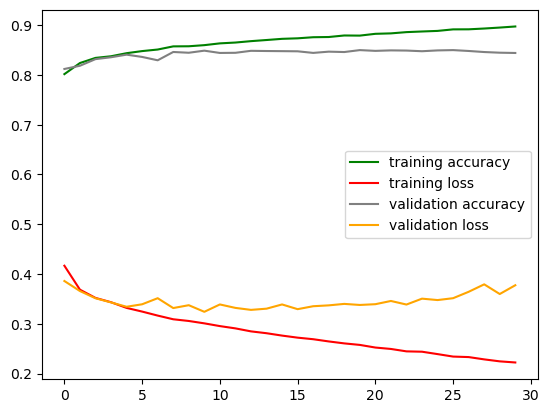

In [85]:
def create_plot(log):
    plt.plot(log.history['accuracy'],label = "training accuracy",color='green')
    plt.plot(log.history['loss'],label = "training loss",color='red')
    plt.plot(log.history['val_accuracy'], label = "validation accuracy",color='grey')
    plt.plot(log.history['val_loss'], label = "validation loss",color='orange')
    plt.legend()
    plt.show()
create_plot(history_simple_dense)

In [86]:
weighted_results = simple_dense_model.evaluate(X_test, y_test, batch_size=32, verbose=0)
# weighted_results = simple_dense_model.evaluate(test_dataset, batch_size=32, verbose=0)

for name, value in zip(simple_dense_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

loss :  0.3219202756881714
accuracy :  0.8520005941390991



In [87]:
# Make predictions on the test data
y_pred = simple_dense_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate accuracy, precision, recall, and F1 score
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

print(report)

simple_dense_model_accuracy = accuracy_score(y_test, y_pred)
simple_dense_model_precision = precision_score(y_test, y_pred)
simple_dense_model_recall = recall_score(y_test, y_pred)
simple_dense_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", simple_dense_model_accuracy)
print("Precision:", simple_dense_model_precision)
print("Recall:", simple_dense_model_recall)
print("F1-score:", simple_dense_model_f1)

1051/1051 [==============================] - 0s 373us/step
              precision    recall  f1-score   support

     Class 0       0.86      0.92      0.89     21229
     Class 1       0.84      0.73      0.79     12386

    accuracy                           0.85     33615
   macro avg       0.85      0.83      0.84     33615
weighted avg       0.85      0.85      0.85     33615

Accuracy: 0.8520005949724825
Precision: 0.8437702940903609
Recall: 0.7342967866946553
F1-score: 0.7852363479387006


# Neural Network 2

# Neural Network with Dropout and Batch Normalization

This model, which includes a dropout layer and batch normalisation for training stability, achieved an accuracy of about 85.09% and an F1 score around 77.98%.


In [88]:
tf.keras.backend.clear_session()

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [89]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

In [90]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [91]:
log = cnn_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1839/1839 [==============================] - 2s 761us/step - loss: 0.4511 - accuracy: 0.7848 - val_loss: 0.3896 - val_accuracy: 0.8123
Epoch 2/30
1839/1839 [==============================] - 1s 703us/step - loss: 0.3946 - accuracy: 0.8120 - val_loss: 0.3698 - val_accuracy: 0.8225
Epoch 3/30
1839/1839 [==============================] - 1s 701us/step - loss: 0.3758 - accuracy: 0.8202 - val_loss: 0.3663 - val_accuracy: 0.8257
Epoch 4/30
1839/1839 [==============================] - 1s 718us/step - loss: 0.3647 - accuracy: 0.8252 - val_loss: 0.3607 - val_accuracy: 0.8280
Epoch 5/30
1839/1839 [==============================] - 1s 702us/step - loss: 0.3587 - accuracy: 0.8313 - val_loss: 0.3556 - val_accuracy: 0.8288
Epoch 6/30
1839/1839 [==============================] - 1s 717us/step - loss: 0.3531 - accuracy: 0.8338 - val_loss: 0.3508 - val_accuracy: 0.8319
Epoch 7/30
1839/1839 [==============================] - 1s 700us/step - loss: 0.3462 - accuracy: 0.8359 - val_loss: 0.3451 -

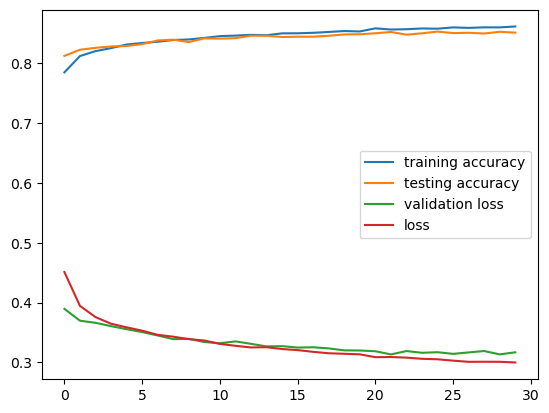

In [92]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "testing accuracy")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.plot(log.history['loss'], label = "loss")
plt.legend()
plt.show()

In [93]:
cnn_model.evaluate(X_test, y_test)

1051/1051 [==============================] - 0s 368us/step - loss: 0.3193 - accuracy: 0.8509


[0.3193344473838806, 0.850899875164032]

In [94]:
# Make predictions on the test data
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate accuracy, precision, recall, and F1 score
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

print(report)

cnn_model_accuracy = accuracy_score(y_test, y_pred)
cnn_model_precision = precision_score(y_test, y_pred)
cnn_model_recall = recall_score(y_test, y_pred)
cnn_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", cnn_model_accuracy)
print("Precision:", cnn_model_precision)
print("Recall:", cnn_model_recall)
print("F1-score:", cnn_model_f1)

1051/1051 [==============================] - 0s 317us/step
              precision    recall  f1-score   support

     Class 0       0.85      0.93      0.89     21229
     Class 1       0.86      0.72      0.78     12386

    accuracy                           0.85     33615
   macro avg       0.85      0.82      0.83     33615
weighted avg       0.85      0.85      0.85     33615

Accuracy: 0.8508998958798155
Precision: 0.8553392444101773
Recall: 0.7165347973518489
F1-score: 0.7798084526842984


# Neural Network 3

# Neural Network with Hyperparameter Tuning

Despite implementing hyperparameter tuning via random search, this model only achieved an accuracy of 82.42% and an F1-score of 73.32%, lower than the simple NN model.


In [95]:
tf.keras.backend.clear_session()

# Prepare the data
# Assuming you have already prepared X_train, y_train, X_test, y_test

# Define the model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=X_train.shape[1:]))
    model.add(layers.Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
    # model.add(layers.Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.BatchNormalization())
    # model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units3', min_value=16, max_value=64, step=16), activation='relu'))
    # model.add(layers.Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Create a callback to retain the best model
# checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("history/CNN",
                                                         monitor = 'val_accuracy',
                                                         mode='max',
                                                         save_weights_only=True,
                                                         save_best_only=True)


# Create the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to store the tuning results
    project_name='my_project'  # Name for the tuning project
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]

# Build and train the final model with the best hyperparameters
cnn_hypt_model = tuner.hypermodel.build(best_hps)
cnn_hypt_model_history=cnn_hypt_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_callback])

# Load the best model weights
cnn_hypt_model.load_weights('./history/CNN')

INFO:tensorflow:Reloading Tuner from my_dir/my_project/tuner0.json


INFO:tensorflow:Reloading Tuner from my_dir/my_project/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/30
1839/1839 [==============================] - 1s 617us/step - loss: 0.6998 - accuracy: 0.6056 - val_loss: 0.5235 - val_accuracy: 0.7611
Epoch 2/30
1839/1839 [==============================] - 1s 560us/step - loss: 0.5130 - accuracy: 0.7571 - val_loss: 0.4650 - val_accuracy: 0.7849
Epoch 3/30
1839/1839 [==============================] - 1s 554us/step - loss: 0.4741 - accuracy: 0.7786 - val_loss: 0.4428 - val_accuracy: 0.7972
Epoch 4/30
1839/1839 [==============================] - 1s 557us/step - loss: 0.4578 - accuracy: 0.7872 - val_loss: 0.4348 - val_accuracy: 0.7984
Epoch 5/30
1839/1839 [==============================] - 1s 555us/step - loss: 0.4487 - accuracy: 0.7911 - val_loss: 0.4276 - val_accuracy: 0.8035
Epoch 6/30
1839/1839 [==============================] - 1s 556us/step - loss: 0.4397 - accuracy: 0.7952 - val_loss: 0.4242 - val_accuracy: 0.8038
Epoch 7/30
1839/1839 [==============================] - 1s 556us/step - loss: 0.4312 - accuracy: 0.7979 - val_loss: 0.4177 -

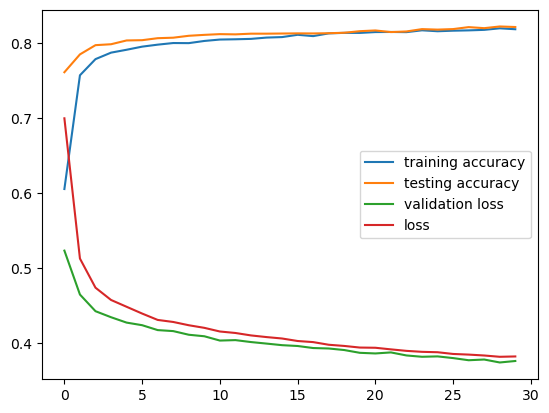

In [96]:
plt.plot(cnn_hypt_model_history.history['accuracy'],label = "training accuracy")
plt.plot(cnn_hypt_model_history.history['val_accuracy'], label = "testing accuracy")
plt.plot(cnn_hypt_model_history.history['val_loss'], label = "validation loss")
plt.plot(cnn_hypt_model_history.history['loss'], label = "loss")
plt.legend()
plt.show()

In [97]:
cnn_hypt_model.evaluate(X_test, y_test)

1051/1051 [==============================] - 0s 351us/step - loss: 0.3750 - accuracy: 0.8242


[0.37495851516723633, 0.8242153525352478]

In [98]:
# Make predictions on the test data
y_pred = cnn_hypt_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate accuracy, precision, recall, and F1 score
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

print(report)
cnn_hypt_model_accuracy = accuracy_score(y_test, y_pred)
cnn_hypt_model_precision = precision_score(y_test, y_pred)
cnn_hypt_model_recall = recall_score(y_test, y_pred)
cnn_hypt_model_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", cnn_hypt_model_accuracy)
print("Precision:", cnn_hypt_model_precision)
print("Recall:", cnn_hypt_model_recall)
print("F1-score:", cnn_hypt_model_f1)

1051/1051 [==============================] - 0s 339us/step
              precision    recall  f1-score   support

     Class 0       0.82      0.92      0.87     21229
     Class 1       0.83      0.66      0.73     12386

    accuracy                           0.82     33615
   macro avg       0.83      0.79      0.80     33615
weighted avg       0.83      0.82      0.82     33615

Accuracy: 0.8242153800386732
Precision: 0.831847525361205
Recall: 0.655417406749556
F1-score: 0.7331677579589071


# RNN

The RNN models, better suited for sequential datasets than classification problems, still surpassed our baseline models but perform worse than logistic regression, achieving an accuracy of approximately 75.2% and an F1 score of around 49.37%.

In [99]:
# Train the model
model_RNN = tf.keras.Sequential([
    tf.keras.Input(shape=(64,1)),
    SimpleRNN(4),
    Dropout(0.2),
    Dense(2, activation='sigmoid')])
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 24        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Transfer to tensor data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [101]:
batch_size = 32
shuffle_buffer_size = 100

train_dataset = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
valid_dataset = valid_dataset.batch(batch_size)

In [102]:
# train the model:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("y_RNN",save_best_only=True)
model_RNN.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
history_RNN = model_RNN.fit(train_dataset,
                    epochs=20,
                    validation_data=valid_dataset,
                    callbacks=[checkpoint_cb])

model_RNN = tf.keras.models.load_model("y_RNN")
print(f"RNN_Accuracy: {model_RNN.evaluate(test_dataset)[1]:.2f}")

Epoch 1/20
1823/1839 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7225

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 7s 3ms/step - loss: 0.5695 - accuracy: 0.7229 - val_loss: 0.5323 - val_accuracy: 0.7426
Epoch 2/20
1830/1839 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7432

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5385 - accuracy: 0.7434 - val_loss: 0.5176 - val_accuracy: 0.7517
Epoch 3/20
1833/1839 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7493

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5272 - accuracy: 0.7494 - val_loss: 0.5141 - val_accuracy: 0.7515
Epoch 4/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5229 - accuracy: 0.7510 - val_loss: 0.5179 - val_accuracy: 0.7515
Epoch 5/20
1834/1839 [============================>.] - ETA: 0s - loss: 0.5201 - accuracy: 0.7514

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5199 - accuracy: 0.7516 - val_loss: 0.5139 - val_accuracy: 0.7516
Epoch 6/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5187 - accuracy: 0.7507 - val_loss: 0.5161 - val_accuracy: 0.7515
Epoch 7/20
1837/1839 [============================>.] - ETA: 0s - loss: 0.5170 - accuracy: 0.7510

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5170 - accuracy: 0.7510 - val_loss: 0.5119 - val_accuracy: 0.7516
Epoch 8/20
1836/1839 [============================>.] - ETA: 0s - loss: 0.5163 - accuracy: 0.7501

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5162 - accuracy: 0.7502 - val_loss: 0.5106 - val_accuracy: 0.7516
Epoch 9/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5169 - accuracy: 0.7505 - val_loss: 0.5129 - val_accuracy: 0.7516
Epoch 10/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5165 - accuracy: 0.7499 - val_loss: 0.5113 - val_accuracy: 0.7516
Epoch 11/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5163 - accuracy: 0.7498 - val_loss: 0.5109 - val_accuracy: 0.7516
Epoch 12/20
1832/1839 [============================>.] - ETA: 0s - loss: 0.5160 - accuracy: 0.7498

INFO:tensorflow:Assets written to: y_RNN/assets


INFO:tensorflow:Assets written to: y_RNN/assets


1839/1839 [==============================] - 6s 3ms/step - loss: 0.5158 - accuracy: 0.7500 - val_loss: 0.5094 - val_accuracy: 0.7516
Epoch 13/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5159 - accuracy: 0.7500 - val_loss: 0.5111 - val_accuracy: 0.7516
Epoch 14/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5169 - accuracy: 0.7503 - val_loss: 0.5120 - val_accuracy: 0.7516
Epoch 15/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5152 - accuracy: 0.7502 - val_loss: 0.5108 - val_accuracy: 0.7516
Epoch 16/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5153 - accuracy: 0.7503 - val_loss: 0.5101 - val_accuracy: 0.7516
Epoch 17/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5157 - accuracy: 0.7507 - val_loss: 0.5106 - val_accuracy: 0.7516
Epoch 18/20
1839/1839 [==============================] - 6s 3ms/step - loss: 0.5151 - accuracy: 0.7501 - val_loss: 0.5101 - val_accuracy: 0.75

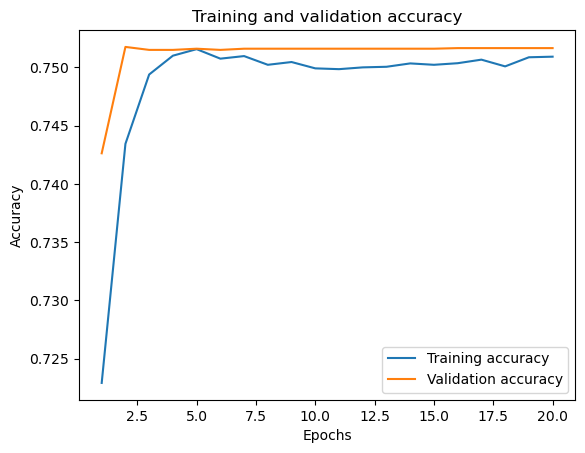

In [103]:
# plot training and validation accuracy
acc = history_RNN.history['accuracy']
val_acc = history_RNN.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [104]:
# Predict the results
model_RNN= tf.keras.models.load_model("y_RNN")

# predict on test dataset
y_RNN_pred = model_RNN.predict(test_dataset)
y_RNN_class = np.argmax(y_RNN_pred, axis=1)
# print first 10 predictions
print(y_RNN_class[:5])

1051/1051 [==============================] - 1s 909us/step
[0 1 0 0 0]


In [105]:
# Calculate accuracy, precision, recall, and F1 score
report = classification_report(y_test, y_RNN_class, target_names=['Class 0', 'Class 1'])

print(report)

# Print the accuracy rate
rnn_model_accuracy = accuracy_score(y_test, y_RNN_class)
rnn_model_precision = precision_score(y_test, y_RNN_class)
rnn_model_recall = recall_score(y_test, y_RNN_class)
rnn_model_f1 = f1_score(y_test, y_RNN_class)

# Print the evaluation metrics
print("Accuracy:", rnn_model_accuracy)
print("Precision:", rnn_model_precision)
print("Recall:", rnn_model_recall)
print("F1-score:", rnn_model_f1)

              precision    recall  f1-score   support

     Class 0       0.72      1.00      0.84     21229
     Class 1       0.99      0.33      0.49     12386

    accuracy                           0.75     33615
   macro avg       0.86      0.66      0.66     33615
weighted avg       0.82      0.75      0.71     33615

Accuracy: 0.7516287371709058
Precision: 0.9919571045576407
Recall: 0.3285968028419183
F1-score: 0.49366244162775186


# Model Comparisons

In [135]:
models = pd.DataFrame({
'Model' : [ 
    'Logistic Regression', 
            'KNN', 
            'XgBoost',
            'Decision Tree', 
            'Random Forest Classifier',
            'SVM', 
            'Gradient Boosting', 
            'Gradient Boosting Hyperparameter Tuning', 
            'Neural Network 1 (Simple NN)',
            'Neural Network 2 (NN with Dropout and Batch Normalization)', 
            'Neural Network 3 (NN with Hyperparameter Tuning)',
            'RNN',
            'Naive Bayes'
            ],

'Accuracy Score' : [
    log_reg_model_accuracy, 
                    knn_model_accuracy, 
                    xgboost_model_accuracy, 
                    dt_model_accuracy,
                    rf_model_accuracy,
                    svm_model_accuracy, 
                    gb_model_accuracy, 
                    gb_hpyt_model_accuracy, 
                    simple_dense_model_accuracy,
                    cnn_model_accuracy, 
                    cnn_hypt_model_accuracy,
                    rnn_model_accuracy,
                    0.631
            ],

'F1 Score' : [  
    log_reg_model_f1, 
                knn_model_f1, 
                xgboost_model_f1, 
                dt_model_f1,
                rf_model_f1,
                svm_model_f1, 
                gb_model_f1, 
                gb_hpyt_model_f1, 
                simple_dense_model_f1,
                cnn_model_f1, 
                cnn_hypt_model_f1,
                rnn_model_f1,
                '-'
            ]
})

models.sort_values(by = 'Accuracy Score', ascending = False, inplace = True)

In [136]:
models

Model  Accuracy Score  \
4                            Random Forest Classifier        0.876335   
2                                             XgBoost        0.864108   
7             Gradient Boosting Hyperparameter Tuning        0.853161   
8                        Neural Network 1 (Simple NN)        0.852001   
9   Neural Network 2 (NN with Dropout and Batch No...        0.850900   
3                                       Decision Tree        0.844772   
6                                   Gradient Boosting        0.835966   
5                                                 SVM        0.830582   
10   Neural Network 3 (NN with Hyperparameter Tuning)        0.824215   
1                                                 KNN        0.805563   
0                                 Logistic Regression        0.805266   
11                                                RNN        0.751629   
12                                        Naive Bayes        0.631000   

    F1 Score  
4   0.823054  
2   0.807176  
7   0.790652  
8   0.785236  
9   0.779808  
3   0.778936  
6   0.763854  
5   0.738869  
10  0.733168  
1   0.728864  
0   0.691779  
11  0.493662  
12         -

Our study, aimed at predicting hotel booking cancellations, harnessed a Kaggle dataset featuring over 100k data points across 30 variables. Establishing a baseline accuracy of 63.1% with a naïve model, we improved this significantly with a Logistic Regression model hitting an accuracy rate of 80.53%. Advanced models like RNN outperformed the naive model but fell short of the logistic regression. Random Forest has the accuracy of 87.63% and F1-Score of 82.31%, which beats the even more complex Neural Network model with 85% accuracy. Random forest is an ensemble learning method that operates by constructing multiple decision trees and letting them vote for the outcome. The superior performance of Random Forest could be due to its ability to handle complex interactions between features and its robustness to outliers. However the accuracy between the top 3 models are not significantly different with only 1-2% lower.

In [137]:
models.sort_values(by = 'Accuracy Score', ascending = True, inplace = True)
px.bar(data_frame = models, x = 'Accuracy Score', y = 'Model', template = 'plotly_white',color = 'Accuracy Score', title = 'Models Comparison')

# Business Implications and Recommendations


Accurate cancellation predictions enable efficient resource management and cancellation reduction strategies, enhancing revenue. By identifying potential cancellations in advance, hotel can optimise staffing levels, adjust room inventory, and streamline logistical arrangements. This leads to improved operational efficiency and cost savings. 

In addition, the cancellation prediction model can guide marketing and promotional activities. Key findings suggest strategies such as offering incentives for closer bookings, given 'lead_time' is a significant factor.

However, not all cancellations, particularly those due to unpredictable external events, can be forecasted by these models.

# Recommendations:
Early Booking Discounts: Offer non-refundable discounts for early bookings to encourage commitments.<br>

Tiered Policies: Adopt stricter cancellation policies for longer lead times to prevent last-minute cancellations.<br>

Regular Engagement: Keep customer interest with regular reminders and additional service offers for those who booked in advance.<br>

Dynamic Pricing: Implement higher rates for far-in-advance bookings due to their higher cancellation risk.<br>

Channel Corporation: Prioritise collaborating with group and corporate channels, mitigating the higher risk of cancellations associated with online bookings.<br>

Overbooking: Strategically overbook, especially in peak seasons, to mitigate cancellation impact.<br>

Loyalty Perks: Provide flexible cancellation policies or lower fees for loyal customers to minimise cancellations.<br>

Country-Specific Marketing: Recognizing the importance of the country feature, tailoring marketing efforts and promotional campaigns to specific countries or regions can be effective such as focusing more on attracting European guests who have less cancellation behaviour.<br>


# Conclusion Future Directions


The utilisation of machine learning models to predict hotel booking cancellations yielded high accuracy, with most models surpassing 80%. The derived insights offer practical implications for the hotel industry, informing strategies for optimal cancellation management and revenue maximisation. Recognizing key cancellation predictors aids in the tailoring of effective pricing and operational strategies. As the data-driven era progresses, harnessing such advanced technologies will be pivotal to the hotel industry's sustained success and growth.

# References

Chen, S. et al. (2023) ‘Prediction of hotel booking cancellations: Integration of machine learning and probability model based on interpretable feature interaction’, Decision Support Systems, 170, p. 113959. doi:10.1016/j.dss.2023.113959. 

Mostipak, J. (2020, February 13). Hotel Booking Demand. Kaggle. https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand 
 
Helmold, M. (2020) “Total Revenue Management (TRM),” Management for Professionals, pp. 1–12. Available at: https://doi.org/10.1007/978-3-030-46985-6_1.
 
Talluri, K. T., & Van Ryzin, G. (2004). The theory and practice of revenue management. Boston, MA, USA: Kluwer Academic Publishers.
 
PricewaterhouseCoopers (2022) Hotels Forecast 2022 - 2023: Recovery stalls after strong rebound, PwC. Available at: https://www.pwc.co.uk/industries/hospitality-leisure/insights/uk-hotels-forecast.html (Accessed: 10 July 2023).
